# IA048 - Aprendizado de Máquina 
## Exercício de Fixação de Conceitos (EFC) 3 - 2s2020

### Exercício 1-a)

In [1]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as sk    
from sklearn import preprocessing
import numpy as np
import seaborn as sns 
import torch as th
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch import optim

In [2]:
data = pd.read_csv("dados_diabetes.csv")

In [3]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
data.info()
data["Outcome"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


0    500
1    268
Name: Outcome, dtype: int64

As one may see from the last execution, our dataset is not balanced since we have 500 non-diabetics and 268 diabetics.

In [5]:
diabet = data.loc[data["Outcome"] == 1]
n_diabet = data.loc[data["Outcome"] == 0]

In [6]:
features = diabet.columns.tolist()

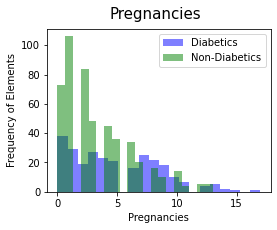

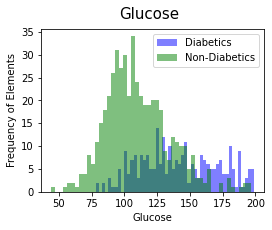

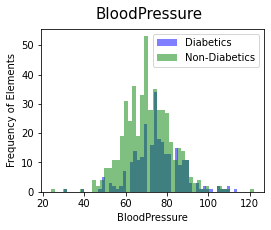

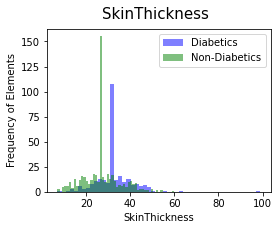

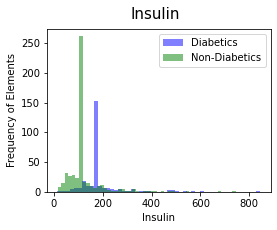

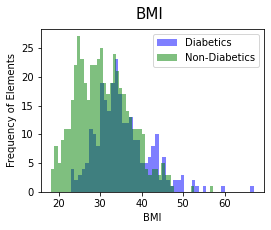

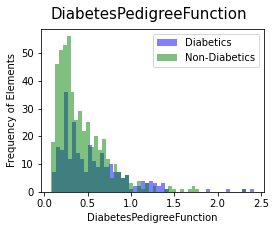

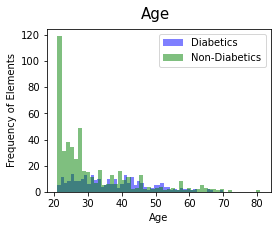

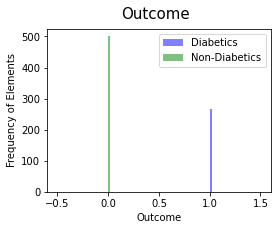

In [7]:
for k in features:
    plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
    if (k == "Pregnancies"):
        plt.hist(diabet[k],bins=20,alpha=0.5,label='Diabetics',color='Blue')
        plt.hist(n_diabet[k],bins=20,alpha=0.5,label='Non-Diabetics',color='Green')
    else:
        plt.hist(diabet[k],bins=50,alpha=0.5,label='Diabetics',color='Blue')
        plt.hist(n_diabet[k],bins=50,alpha=0.5,label='Non-Diabetics',color='Green')
    plt.legend(loc='upper right')
    plt.suptitle(k, fontsize = 15)
    plt.xlabel(k)
    plt.ylabel("Frequency of Elements")
    plt.show()

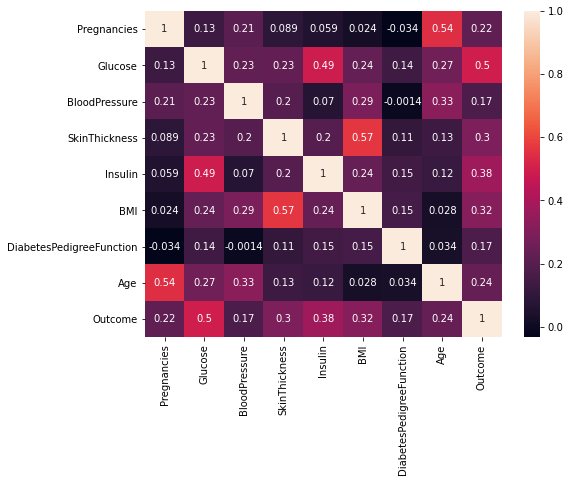

In [8]:
data_corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data_corr, annot = True)
plt.show()

In [9]:
# Normalizing our data with the MinMax Scaler
data_np = data.values
min_max_scaler = preprocessing.MinMaxScaler()
data_np_norm = min_max_scaler.fit_transform(data_np)
data_norm = pd.DataFrame(data_np_norm, columns= data.columns)

In [10]:
# Separating the labels from the features
label = data_norm['Outcome']
x = data_norm.drop(columns=['Outcome'])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,label,stratify=label,test_size=0.2)

In [12]:
# Let's observe if the train test stratified split worked well, we can verify if the proportion of samples
# in the class 0 and 1 are still around the same from the original data
display(y_train.value_counts())
display(y_test.value_counts())

0.0    400
1.0    214
Name: Outcome, dtype: int64

0.0    100
1.0     54
Name: Outcome, dtype: int64

In [13]:
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()

In [14]:
#Now that we pre-treated our data we may implement our Deep Learning models
import torch as th
import torch.nn as nn

X_train = th.from_numpy(X_train).float()
X_test = th.from_numpy(X_test).float()
y_train = th.from_numpy(y_train).float()
y_test = th.from_numpy(y_test).float()


In [15]:
display(y_train.shape)
display(y_test.shape)
display(X_train.shape)
display(X_test.shape)

torch.Size([614])

torch.Size([154])

torch.Size([614, 8])

torch.Size([154, 8])

In [16]:
X_train = X_train
X_test = X_test
y_train = y_train
y_test = y_test

### Exercício 1-b)

In [1]:
# Let's use a mini-batching with SGD to train our model
from sklearn.metrics import accuracy_score

def train(model, optmizer, loss_fn, epochs, batch_size, X_train, y_train, X_test, y_test, verbose=False):
    # Mini-batching and shuffling
    Ntrain = X_train.shape[0]
    Nvalid = X_test.shape[0]
    idx = np.arange(Ntrain)
    # We need to 'break' the training dataset in multiple batches
    nbatch = int(Ntrain/batch_size)

    train_losses, valid_losses, valid_acc = [],[],[]

    for epoch in range(epochs):

        np.random.shuffle(idx)
        running_loss = 0
        # Number of samples in the next loop
        totaln = 0

        for bat in range(nbatch):

            ids = idx[bat*batch_size:(bat+1)*batch_size]
            features = X_train[ids]
            labels = y_train[ids]
            totaln = totaln + labels.shape[0]

            optimizer.zero_grad()
            model_application = model(features)
            loss = loss_fn(model_application,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        
        accuracy = 0
        valid_loss = 0
        with th.no_grad():
            features = X_test
            labels = y_test
            model_application = model(features)
            valid_loss = loss_fn(model_application, labels)
            y_pred = []

            for k in range(len(model_application)):
                if (model_application[k] >= 0.5):
                    y_pred.append(1)
                else:
                    y_pred.append(0)

            accuracy = accuracy_score(y_pred, labels)

            train_losses.append(running_loss/batch_size)
            valid_losses.append(valid_loss)
            valid_acc.append(accuracy*100)
            #print("Epoch: {}\t".format(epoch),
              #"train Loss: {:.5f}.. ".format(train_losses[-1]),
              #"valid Loss: {:.5f}.. ".format(valid_losses[-1]),
              #"valid Accuracy: {:.3f}".format(valid_acc[-1]))  

    print("---------- Best : {:.3f}".format(max(valid_acc)), " at epoch " 
      , np.fromiter(valid_acc, dtype=np.float).argmax(), " / ",epochs )
    
    #plt.figure(figsize = (9, 1.5))
    #ax= plt.subplot(1, 3, 1)
    #plt.plot(train_losses)
    #ax.set_ylim(bottom=0)
    #ax= plt.subplot(1, 3, 2)
    #plt.plot(valid_losses)
    #ax.set_ylim(bottom=0)
    #ax= plt.subplot(1, 3, 3)
    #plt.plot(valid_acc)
    #ax.set_ylim(bottom=0)
    return labels, y_pred, max(valid_acc)


In [2]:
n_samples = 40
D_hidden1 = np.linspace(1, n_samples, n_samples)
print(D_hidden1)
Max_Ac = np.zeros(n_samples)
print(Max_Ac.shape)

NameError: name 'np' is not defined

In [19]:
## training parameters
epochs=150
batch_size = 20
## model
n_samples = 40
D_hidden = np.linspace(1, n_samples, n_samples)
Max_Ac = np.zeros(n_samples)
D_in = 8
D_out= 1
for i in range(n_samples):
    D_hidden1 = int(D_hidden[i])
    model = nn.Sequential(nn.Linear(D_in,D_hidden1),
                        nn.ReLU(),
                        nn.Linear(D_hidden1,D_out),
                        nn.Sigmoid())
    optimizer=th.optim.Adam(model.parameters(),lr=0.01)
    loss_fn=nn.BCELoss()
    labels, y_pred, Max_Ac[i] = train(model,optimizer,loss_fn,epochs,batch_size,X_train,y_train,X_test,y_test)

---------- Best : 83.117  at epoch  60  /  150
---------- Best : 83.766  at epoch  137  /  150
---------- Best : 83.117  at epoch  48  /  150
---------- Best : 88.961  at epoch  75  /  150
---------- Best : 88.312  at epoch  73  /  150
---------- Best : 89.610  at epoch  101  /  150
---------- Best : 88.312  at epoch  143  /  150
---------- Best : 87.662  at epoch  51  /  150
---------- Best : 88.312  at epoch  47  /  150
---------- Best : 88.961  at epoch  139  /  150
---------- Best : 88.312  at epoch  64  /  150
---------- Best : 89.610  at epoch  97  /  150
---------- Best : 87.662  at epoch  70  /  150
---------- Best : 87.662  at epoch  111  /  150
---------- Best : 88.312  at epoch  137  /  150
---------- Best : 87.662  at epoch  53  /  150
---------- Best : 88.312  at epoch  46  /  150
---------- Best : 88.961  at epoch  132  /  150
---------- Best : 88.312  at epoch  98  /  150
---------- Best : 88.312  at epoch  67  /  150
---------- Best : 88.312  at epoch  89  /  150
------

A acurácia max é 90.25974025974025 quando temos  29  neurônios na camada intermediaria
[83.11688312 83.76623377 83.11688312 88.96103896 88.31168831 89.61038961
 88.31168831 87.66233766 88.31168831 88.96103896 88.31168831 89.61038961
 87.66233766 87.66233766 88.31168831 87.66233766 88.31168831 88.96103896
 88.31168831 88.31168831 88.31168831 88.96103896 88.96103896 88.31168831
 88.96103896 88.31168831 88.96103896 88.31168831 90.25974026 88.96103896
 89.61038961 88.96103896 88.31168831 88.96103896 90.25974026 89.61038961
 88.96103896 88.31168831 88.31168831 89.61038961]


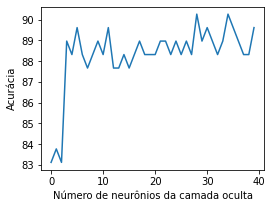

In [20]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(Max_Ac)
plt.xlabel("Número de neurônios da camada oculta")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos ", np.argmax(Max_Ac)+1, " neurônios na camada intermediaria")
print(Max_Ac)
neuron_hidden_layer = np.argmax(Max_Ac)+1

A partir de 5 neuronios na camada oculta já atingimos uma suficiente complexidade do modelo para termos resultados próximos à 90%

In [21]:
## training parameters
epochs=150
n_samples = 40
batch_size = np.linspace(1, n_samples, n_samples)
## model
D_hidden = np.linspace(1, n_samples, n_samples)
Max_Ac = np.zeros(n_samples)
D_in = 8
D_out= 1
D_hidden = neuron_hidden_layer
for i in range(n_samples):
    model = nn.Sequential(nn.Linear(D_in,D_hidden1),
                        nn.ReLU(),
                        nn.Linear(D_hidden1,D_out),
                        nn.Sigmoid())
    optimizer=th.optim.Adam(model.parameters(),lr=0.01)
    loss_fn=nn.BCELoss()
    labels, y_pred, Max_Ac[i] = train(model,optimizer,loss_fn,epochs,int(batch_size[i]),X_train,y_train,X_test,y_test)

---------- Best : 88.961  at epoch  27  /  150
---------- Best : 90.260  at epoch  99  /  150
---------- Best : 88.961  at epoch  64  /  150
---------- Best : 89.610  at epoch  36  /  150
---------- Best : 88.961  at epoch  36  /  150
---------- Best : 88.961  at epoch  98  /  150
---------- Best : 88.961  at epoch  73  /  150
---------- Best : 88.961  at epoch  33  /  150
---------- Best : 89.610  at epoch  62  /  150
---------- Best : 89.610  at epoch  108  /  150
---------- Best : 88.961  at epoch  75  /  150
---------- Best : 90.260  at epoch  119  /  150
---------- Best : 88.961  at epoch  30  /  150
---------- Best : 90.260  at epoch  61  /  150
---------- Best : 90.260  at epoch  148  /  150
---------- Best : 88.961  at epoch  114  /  150
---------- Best : 90.260  at epoch  89  /  150
---------- Best : 89.610  at epoch  87  /  150
---------- Best : 89.610  at epoch  110  /  150
---------- Best : 89.610  at epoch  119  /  150
---------- Best : 88.961  at epoch  122  /  150
------

A acurácia max é 90.9090909090909 quando temos  31  batch_size


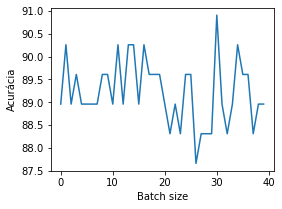

In [22]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(Max_Ac)
plt.xlabel("Batch size")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos ", np.argmax(Max_Ac)+1, " batch_size")
batch_optimal = np.argmax(Max_Ac)+1

In [23]:
## training parameters
epochs=150
batch_size = batch_optimal
print(batch_optimal)
n_samples = 100
lrate = np.linspace(0.1, 0.001, n_samples)
## model
Max_Ac = np.zeros(n_samples)
D_in = 8
D_out= 1
D_hidden = neuron_hidden_layer
for i in range(n_samples):
    model = nn.Sequential(nn.Linear(D_in,D_hidden1),
                        nn.ReLU(),
                        nn.Linear(D_hidden1,D_out),
                        nn.Sigmoid())
    optimizer=th.optim.Adam(model.parameters(), lr = lrate[i])
    loss_fn=nn.BCELoss()
    labels, y_pred, Max_Ac[i] = train(model,optimizer,loss_fn,epochs,batch_size,X_train,y_train,X_test,y_test)

31
---------- Best : 89.610  at epoch  102  /  150
---------- Best : 89.610  at epoch  72  /  150
---------- Best : 88.312  at epoch  47  /  150
---------- Best : 87.662  at epoch  21  /  150
---------- Best : 88.312  at epoch  28  /  150
---------- Best : 88.961  at epoch  47  /  150
---------- Best : 88.961  at epoch  37  /  150
---------- Best : 88.961  at epoch  85  /  150
---------- Best : 89.610  at epoch  32  /  150
---------- Best : 89.610  at epoch  118  /  150
---------- Best : 89.610  at epoch  70  /  150
---------- Best : 90.260  at epoch  128  /  150
---------- Best : 89.610  at epoch  85  /  150
---------- Best : 88.312  at epoch  51  /  150
---------- Best : 89.610  at epoch  126  /  150
---------- Best : 89.610  at epoch  32  /  150
---------- Best : 88.961  at epoch  136  /  150
---------- Best : 88.961  at epoch  24  /  150
---------- Best : 89.610  at epoch  84  /  150
---------- Best : 90.909  at epoch  146  /  150
---------- Best : 88.312  at epoch  46  /  150
----

A acurácia max é 90.9090909090909 quando temos lr =  0.081


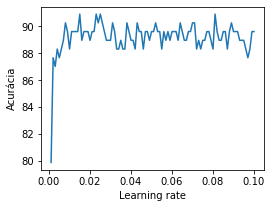

In [24]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(lrate, Max_Ac)
plt.xlabel("Learning rate")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos lr = ", lrate[np.argmax(Max_Ac)])
best_lr = lrate[np.argmax(Max_Ac)]

### Exercício 1-c)

In [55]:
# Let's use a mini-batching with SGD to train our model
from sklearn.metrics import accuracy_score

def train(model, optmizer, loss_fn, epochs, batch_size, X_train, y_train, X_test, y_test, verbose=False):
    # Mini-batching and shuffling
    Ntrain = X_train.shape[0]
    Nvalid = X_test.shape[0]
    idx = np.arange(Ntrain)
    # We need to 'break' the training dataset in multiple batches
    nbatch = int(Ntrain/batch_size)

    train_losses, valid_losses, valid_acc = [],[],[]
    y_pred_matrix = []

    for epoch in range(epochs):

        np.random.shuffle(idx)
        running_loss = 0
        # Number of samples in the next loop
        totaln = 0

        for bat in range(nbatch):

            ids = idx[bat*batch_size:(bat+1)*batch_size]
            features = X_train[ids]
            labels = y_train[ids]
            totaln = totaln + labels.shape[0]

            optimizer.zero_grad()
            model_application = model(features)
            loss = loss_fn(model_application,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        

        accuracy = 0
        valid_loss = 0
        with th.no_grad():
            features = X_test
            labels = y_test
            model_application = model(features)
            valid_loss = loss_fn(model_application, labels)
            y_pred = []

            for k in range(len(model_application)):
                if (model_application[k] >= 0.5):
                    y_pred.append(1)
                else:
                    y_pred.append(0)

            accuracy = accuracy_score(y_pred, labels)

            train_losses.append(running_loss/batch_size)
            valid_losses.append(valid_loss)
            valid_acc.append(accuracy*100)
            y_pred_matrix.append(y_pred)
            #print("Epoch: {}\t".format(epoch),
              #"train Loss: {:.5f}.. ".format(train_losses[-1]),
              #"valid Loss: {:.5f}.. ".format(valid_losses[-1]),
              #"valid Accuracy: {:.3f}".format(valid_acc[-1]))  

    print("---------- Best : {:.3f}".format(max(valid_acc)), " at epoch " 
      , np.fromiter(valid_acc, dtype=np.float).argmax(), " / ",epochs )
    
    plt.figure(figsize = (12, 2.5))
    ax= plt.subplot(1, 3, 1)
    plt.plot(train_losses)
    plt.ylabel('Training Loss')
    plt.xlabel('Epoch')
    ax= plt.subplot(1, 3, 2)
    plt.plot(valid_losses)
    plt.ylabel('Validation Loss')
    plt.xlabel('Epoch')
    ax= plt.subplot(1, 3, 3)
    plt.plot(valid_acc)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    return labels, y_pred_matrix, max(valid_acc)

---------- Best : 90.260  at epoch  53  /  150


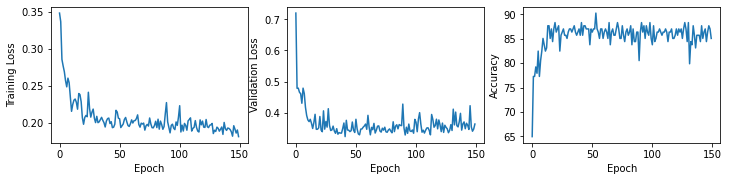

In [57]:
## best parameters
epochs=150
batch_size = batch_optimal
n_samples = 100
## model
D_in = 8
D_out= 1
D_hidden = neuron_hidden_layer
model = nn.Sequential(nn.Linear(D_in,D_hidden1),
                    nn.ReLU(),
                    nn.Linear(D_hidden1,D_out),
                    nn.Sigmoid())
optimizer=th.optim.Adam(model.parameters(), lr = best_lr)
loss_fn=nn.BCELoss()
labels, y_pred, Max_Ac[i] = train(model,optimizer,loss_fn,epochs,batch_size,X_train,y_train,X_test,y_test)

Note que a acurácia entre 87-90% está extremamente próxima (dado que cada amostra de teste representa aproximadamente 0,7%). Deste modo, notamos que a variação do batch size e do learning rate não trouxe grandes mudanças p convergência do modelo. No caso do learning rate, isso pode significar que todos os minimos da função custo são bem proximos (então o passo do aprendizado não é mt importante). No caso do batch size, o aumento dele trouxe apenas um diminuição no tempo de treinamento do modelo 

In [58]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(labels,y_pred[66])
display(confusion_matrix)

array([[87, 13],
       [ 8, 46]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

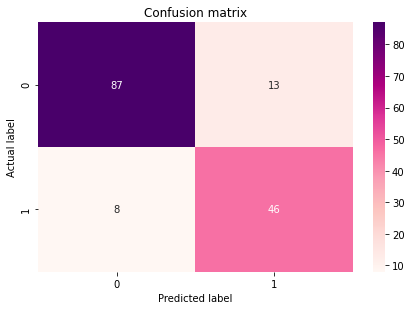

In [59]:
# Confusion matrix for D_hidden = 150
class_names = ["0","1"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Creating a visual confusion matrix in a heatmap form
sns.heatmap(pd.DataFrame(confusion_matrix), cmap="RdPu", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Exercício 2-a)

In [2]:
# Importing from torchdivision and converting to the Tensor form
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST(root=r'C:\Users\Callado\Documents\GitHub\Labs\EFC3', download=False, train=True, transform=transform)
testset = datasets.MNIST(root=r'C:\Users\Callado\Documents\GitHub\Labs\EFC3', download =False, train=False, transform=transform)

RuntimeError: Dataset not found. You can use download=True to download it

In [3]:
# Importing from torchdivision and converting to the Tensor form
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST(root=r'C:\Users\kaleb\Google Drive\UNICAMP\IA048\Labs\EFC3', download=False, train=True, transform=transform)
testset = datasets.MNIST(root=r'C:\Users\kaleb\Google Drive\UNICAMP\IA048\Labs\EFC3', download =False, train=False, transform=transform)

In [4]:
# Loading data
train = th.utils.data.DataLoader(trainset, batch_size=60000, shuffle=True)
test = th.utils.data.DataLoader(testset, batch_size=10000, shuffle=True)

In [5]:
# Iterating in the dataset so we can really catch the data
data_iter = iter(train)
data_iter2 = iter(test)
train_x, train_y = data_iter.next()
test_x, test_y = data_iter2.next()

In [6]:
display(train_x.shape)
display(train_y.shape)
display(test_x.shape)
display(test_y.shape)
trainconv_x = train_x.cuda()
trainconv_y = train_y.cuda()
testconv_x = test_x.cuda()
testconv_y = test_y.cuda()

torch.Size([60000, 1, 28, 28])

torch.Size([60000])

torch.Size([10000, 1, 28, 28])

torch.Size([10000])

In [7]:
# Fixing the shape of the tensor by squeezing the color dimensions (we have B and W images) and reshaping
train_x = th.squeeze(train_x)
test_x = th.squeeze(test_x)
train_x = th.reshape(train_x,(60000,784))
test_x = th.reshape(test_x,(10000,784))
display(train_x.shape)
display(test_x.shape)

torch.Size([60000, 784])

torch.Size([10000, 784])

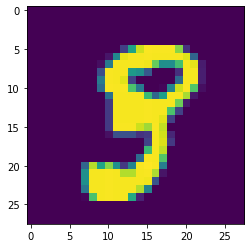

In [7]:
plt.imshow(train_x[4].numpy().reshape(28,28))
plt.show()

In [8]:
train_x = train_x.cuda()
train_y = train_y.cuda()
test_x = test_x.cuda()
test_y = test_y.cuda()

In [9]:
# Creating a function to train our model

def train(model, optimizer, loss_fn, epochs, batch_size, train_x, train_y, test_x, test_y, verbose=False):
    # Mini-batching and shuffling
    Ntrain = train_x.shape[0]
    Nvalid = test_x.shape[0]
    # Number of samples that we treat before updating the grading using SGD
    idx = np.arange(Ntrain)
    nbatch = int(Ntrain/batch_size)

    train_losses,valid_losses,valid_accuracies, y_pred = [],[],[], []
    for e in range(epochs):
        np.random.shuffle(idx)
        running_loss = 0
        totaln = 0
        for b in range(nbatch):
            ids = idx[b*batch_size:(b+1)*batch_size]
            images = train_x[ids]
            labels = train_y[ids]
            totaln = totaln + labels.shape[0] # Number of samples
            optimizer.zero_grad()
            logprobs = model(images)
            loss = loss_fn(logprobs, labels)
            loss.backward()
            optimizer.step()
            running_loss = running_loss + loss.item()
        # Training is over for ONE epoch
        accuracy = 0
        valid_loss = 0
        # The gradient is no more necessary from here, so we can increase the speed of our process by ignoring it
        with th.no_grad():
            images = test_x
            labels = test_y
            logprobs = model(images)
            valid_loss = loss_fn(logprobs, labels)
            top_p, top_class = logprobs.topk(1)
            # topk will take the predicted class with bigger logprobs value when we apply the softmax function
            accuracy = (top_class.T == labels).sum().float()
            train_losses.append(running_loss/batch_size)
            valid_losses.append(valid_loss)
            valid_accuracies.append(accuracy.item()*100/Nvalid)
            y_pred.append(top_class.T.squeeze().cpu())
    
        print("Epoch: {}\t".format(e),"train Loss: {:.5f}.. ".format(train_losses[-1]), "valid Loss: {:.5f}.. ".format(valid_losses[-1]),"valid Accuracy: {:.3f}".format(valid_accuracies[-1])) 
    print('Training/Validation done')
    print("---------- Best : {:.3f}".format(max(valid_accuracies)), " at epoch " , np.fromiter(valid_accuracies, dtype=np.float).argmax(), " / ",epochs )

    return y_pred, max(valid_accuracies), np.fromiter(valid_accuracies, dtype=np.float).argmax()




In [10]:
## one hidden layer -> trying to find the optimal number of neurons
epochs= 20
batch_size = 50
n_samples = 20
Max_Ac = np.zeros(n_samples)
epoch = np.zeros(n_samples)

D_in = 784
D_out= 10
D_hidden = np.linspace(10, 200, n_samples)

for k in range(n_samples):
    D_hidden_idx = int(D_hidden[k])
    model = nn.Sequential(nn.Linear(D_in,D_hidden_idx),
                    nn.LeakyReLU(),
                    nn.Linear(D_hidden_idx,D_out),
                    nn.LogSoftmax(dim=1)).cuda()
    optimizer=th.optim.Adam(model.parameters(), lr = 0.005)
    loss_fn=nn.NLLLoss()
    y_pred, Max_Ac[k], epoch[k] = train(model, optimizer, loss_fn, epochs, batch_size, train_x, train_y, test_x, test_y)

Training/Validation done
---------- Best : 97.520  at epoch  16  /  20
Epoch: 0	 train Loss: 5.39674..  valid Loss: 0.12451..  valid Accuracy: 96.270
Epoch: 1	 train Loss: 2.55694..  valid Loss: 0.09909..  valid Accuracy: 96.940
Epoch: 2	 train Loss: 2.00856..  valid Loss: 0.10942..  valid Accuracy: 96.790
Epoch: 3	 train Loss: 1.62567..  valid Loss: 0.11191..  valid Accuracy: 96.960
Epoch: 4	 train Loss: 1.45471..  valid Loss: 0.14461..  valid Accuracy: 96.350
Epoch: 5	 train Loss: 1.27688..  valid Loss: 0.12779..  valid Accuracy: 96.980
Epoch: 6	 train Loss: 1.13475..  valid Loss: 0.13368..  valid Accuracy: 97.380
Epoch: 7	 train Loss: 1.06917..  valid Loss: 0.12904..  valid Accuracy: 97.120
Epoch: 8	 train Loss: 1.09453..  valid Loss: 0.13730..  valid Accuracy: 97.380
Epoch: 9	 train Loss: 0.89433..  valid Loss: 0.14908..  valid Accuracy: 97.230
Epoch: 10	 train Loss: 0.85928..  valid Loss: 0.13234..  valid Accuracy: 97.750
Epoch: 11	 train Loss: 0.87417..  valid Loss: 0.16103..  va

A acurácia max é 97.75 quando temos  90  neurônios na camada intermediaria


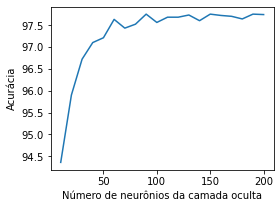

In [15]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(D_hidden,Max_Ac)
plt.xlabel("Número de neurônios da camada oculta")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos ", 10*(np.argmax(Max_Ac)+1), " neurônios na camada intermediaria")
neuron_hidden_layer = np.argmax(Max_Ac)


In [21]:
display(D_hidden[neuron_hidden_layer])

8

In [18]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_y.cpu(),y_pred[neuron_hidden_layer])
display(confusion_matrix)

array([[ 969,    1,    1,    0,    1,    2,    2,    1,    2,    1],
       [   0, 1119,    5,    0,    1,    1,    1,    0,    8,    0],
       [   5,    1, 1004,    2,    6,    0,    2,    3,    9,    0],
       [   2,    0,   11,  979,    2,    4,    1,    4,    5,    2],
       [   1,    0,    1,    0,  965,    0,    4,    0,    1,   10],
       [   4,    0,    0,    5,    1,  871,    3,    1,    7,    0],
       [   5,    3,    2,    0,    6,   10,  929,    0,    3,    0],
       [   4,    5,   10,    3,    2,    0,    0,  993,    5,    6],
       [   2,    0,    3,    3,    1,    7,    0,    2,  951,    5],
       [   5,    3,    0,    3,   14,    5,    0,    1,    6,  972]],
      dtype=int64)

Text(0.5, 15.0, 'Predicted label')

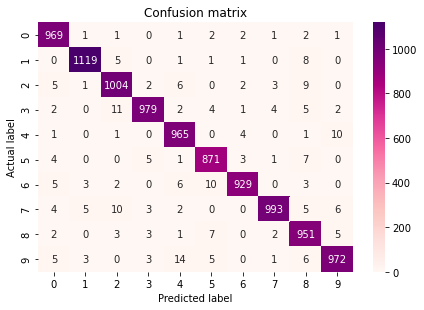

In [19]:
# Confusion matrix for D_hidden = 150
class_names = ["0","1","2","3","4","5","6","8","9"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Creating a visual confusion matrix in a heatmap form
sns.heatmap(pd.DataFrame(confusion_matrix), cmap="RdPu", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

EXPECTED VALUE:  1  PREDICTED VALUE:  6


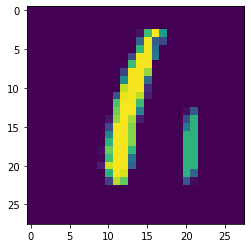

EXPECTED VALUE:  8  PREDICTED VALUE:  7


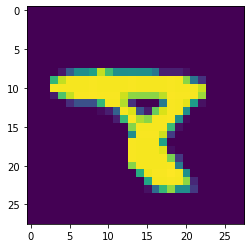

EXPECTED VALUE:  7  PREDICTED VALUE:  2


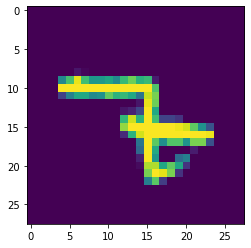

EXPECTED VALUE:  1  PREDICTED VALUE:  8


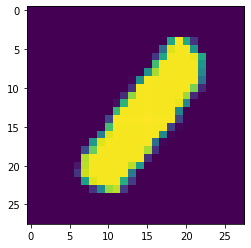

EXPECTED VALUE:  7  PREDICTED VALUE:  9


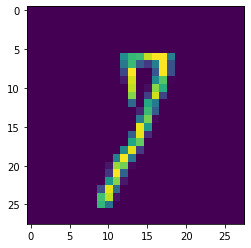

EXPECTED VALUE:  5  PREDICTED VALUE:  6


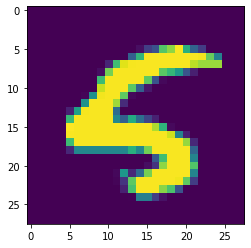

EXPECTED VALUE:  1  PREDICTED VALUE:  2


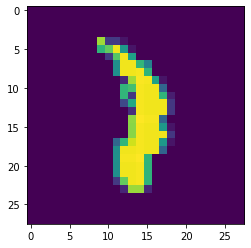

EXPECTED VALUE:  3  PREDICTED VALUE:  4


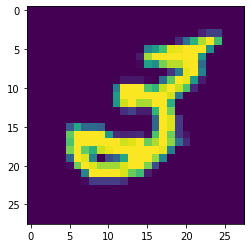

EXPECTED VALUE:  2  PREDICTED VALUE:  0


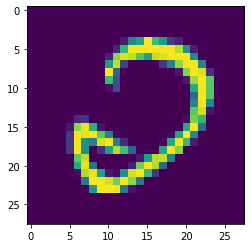

EXPECTED VALUE:  5  PREDICTED VALUE:  0


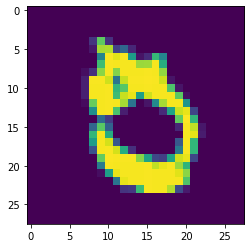

EXPECTED VALUE:  9  PREDICTED VALUE:  0


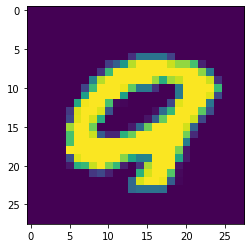

EXPECTED VALUE:  8  PREDICTED VALUE:  3


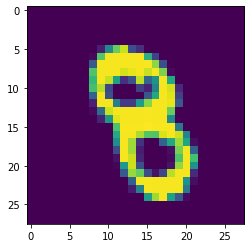

EXPECTED VALUE:  2  PREDICTED VALUE:  4


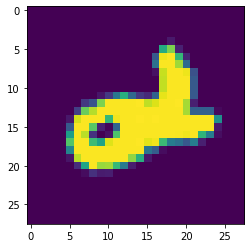

EXPECTED VALUE:  5  PREDICTED VALUE:  8


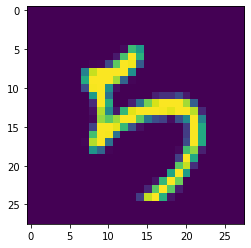

EXPECTED VALUE:  9  PREDICTED VALUE:  4


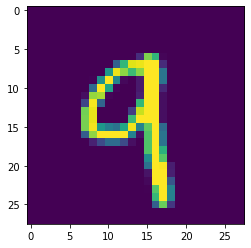

EXPECTED VALUE:  3  PREDICTED VALUE:  8


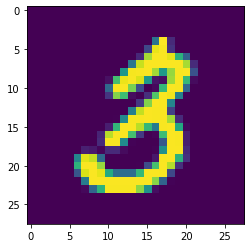

EXPECTED VALUE:  4  PREDICTED VALUE:  9


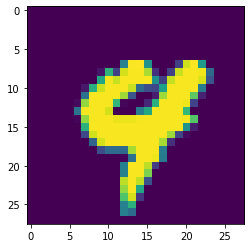

EXPECTED VALUE:  1  PREDICTED VALUE:  2


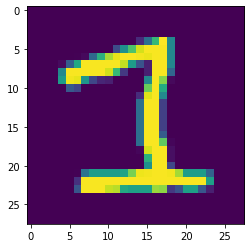

EXPECTED VALUE:  6  PREDICTED VALUE:  0


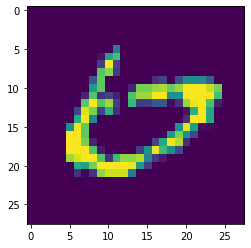

EXPECTED VALUE:  7  PREDICTED VALUE:  2


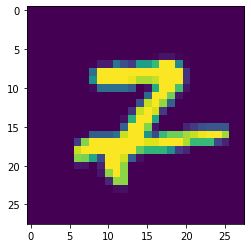

EXPECTED VALUE:  4  PREDICTED VALUE:  9


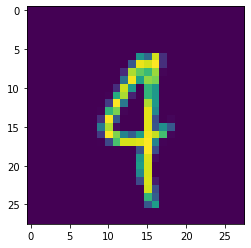

EXPECTED VALUE:  2  PREDICTED VALUE:  7


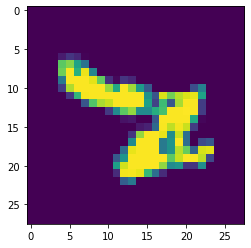

EXPECTED VALUE:  2  PREDICTED VALUE:  1


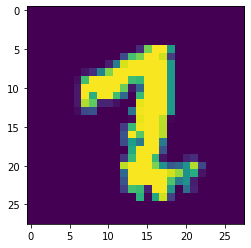

EXPECTED VALUE:  7  PREDICTED VALUE:  8


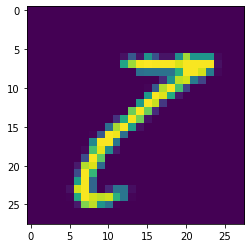

EXPECTED VALUE:  2  PREDICTED VALUE:  4


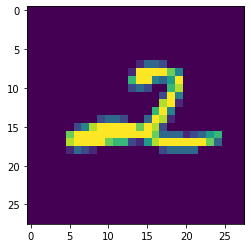

EXPECTED VALUE:  5  PREDICTED VALUE:  6


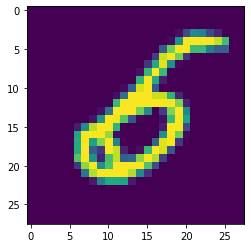

EXPECTED VALUE:  3  PREDICTED VALUE:  8


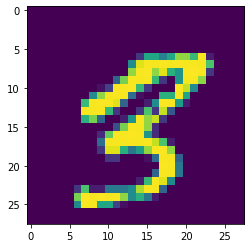

EXPECTED VALUE:  8  PREDICTED VALUE:  5


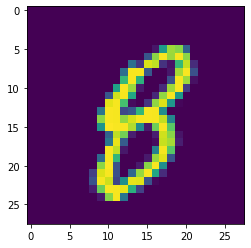

EXPECTED VALUE:  8  PREDICTED VALUE:  5


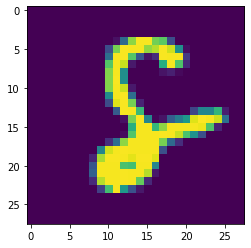

EXPECTED VALUE:  2  PREDICTED VALUE:  4


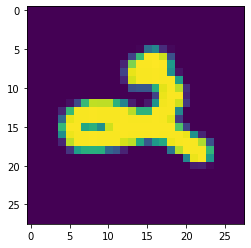

EXPECTED VALUE:  8  PREDICTED VALUE:  3


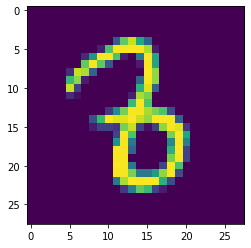

EXPECTED VALUE:  8  PREDICTED VALUE:  9


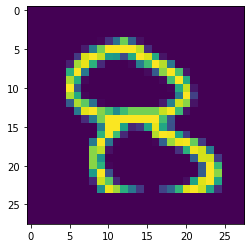

EXPECTED VALUE:  2  PREDICTED VALUE:  7


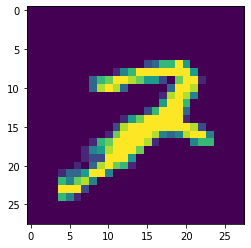

EXPECTED VALUE:  6  PREDICTED VALUE:  4


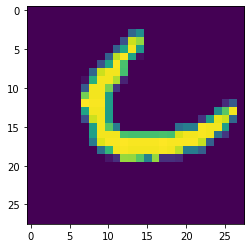

EXPECTED VALUE:  6  PREDICTED VALUE:  0


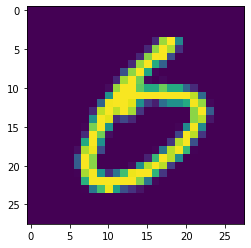

EXPECTED VALUE:  6  PREDICTED VALUE:  4


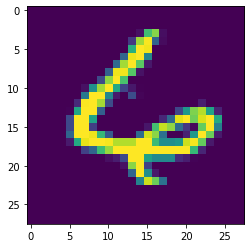

EXPECTED VALUE:  6  PREDICTED VALUE:  1


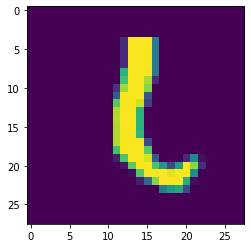

EXPECTED VALUE:  8  PREDICTED VALUE:  5


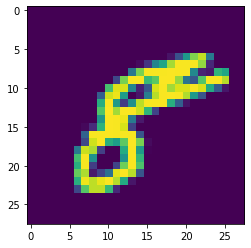

EXPECTED VALUE:  9  PREDICTED VALUE:  5


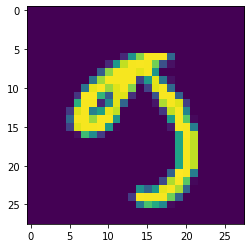

EXPECTED VALUE:  3  PREDICTED VALUE:  2


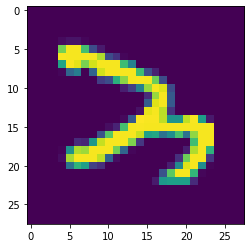

EXPECTED VALUE:  3  PREDICTED VALUE:  9


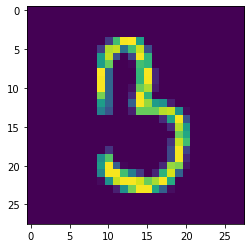

EXPECTED VALUE:  5  PREDICTED VALUE:  3


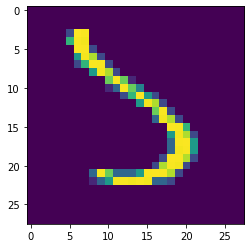

EXPECTED VALUE:  8  PREDICTED VALUE:  9


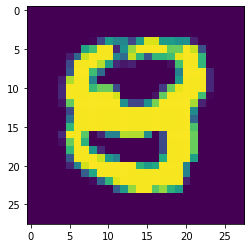

EXPECTED VALUE:  3  PREDICTED VALUE:  2


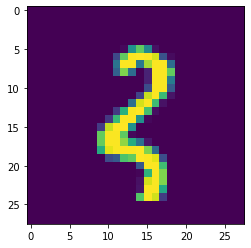

EXPECTED VALUE:  2  PREDICTED VALUE:  8


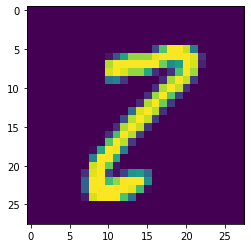

EXPECTED VALUE:  2  PREDICTED VALUE:  7


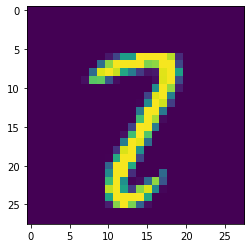

EXPECTED VALUE:  6  PREDICTED VALUE:  1


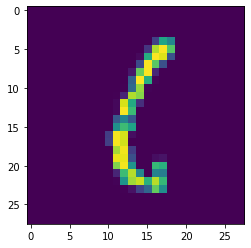

EXPECTED VALUE:  9  PREDICTED VALUE:  8


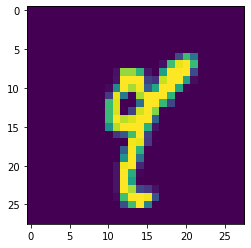

EXPECTED VALUE:  6  PREDICTED VALUE:  8


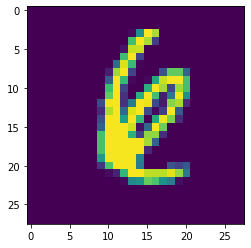

EXPECTED VALUE:  5  PREDICTED VALUE:  8


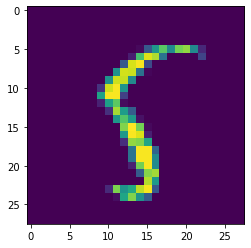

EXPECTED VALUE:  2  PREDICTED VALUE:  3


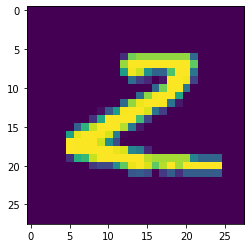

EXPECTED VALUE:  3  PREDICTED VALUE:  2


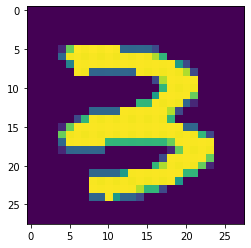

EXPECTED VALUE:  8  PREDICTED VALUE:  2


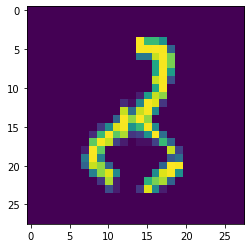

EXPECTED VALUE:  6  PREDICTED VALUE:  5


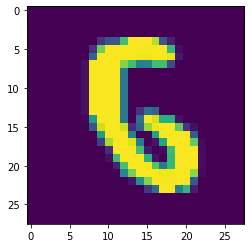

EXPECTED VALUE:  9  PREDICTED VALUE:  5


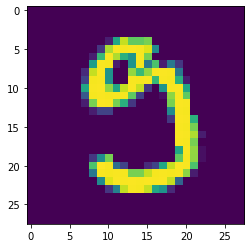

EXPECTED VALUE:  9  PREDICTED VALUE:  0


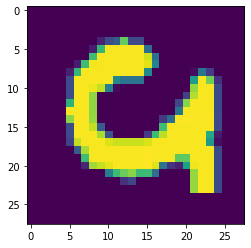

EXPECTED VALUE:  2  PREDICTED VALUE:  0


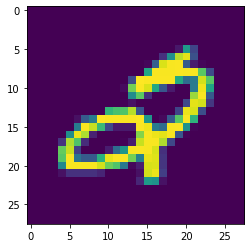

EXPECTED VALUE:  8  PREDICTED VALUE:  0


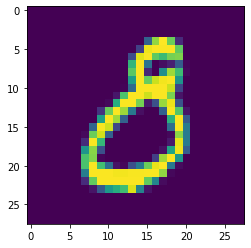

EXPECTED VALUE:  6  PREDICTED VALUE:  2


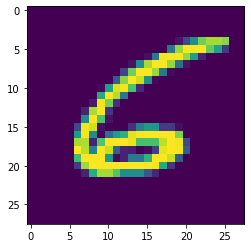

EXPECTED VALUE:  0  PREDICTED VALUE:  4


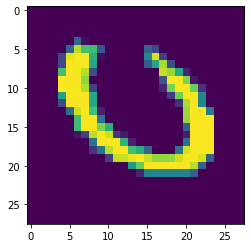

EXPECTED VALUE:  4  PREDICTED VALUE:  6


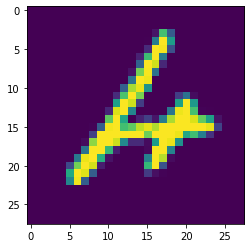

EXPECTED VALUE:  7  PREDICTED VALUE:  9


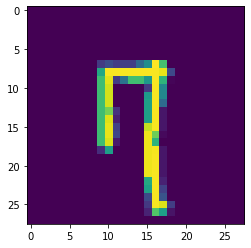

EXPECTED VALUE:  3  PREDICTED VALUE:  0


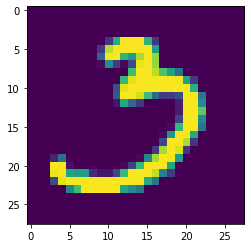

EXPECTED VALUE:  0  PREDICTED VALUE:  8


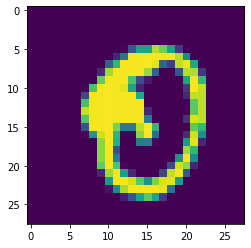

EXPECTED VALUE:  5  PREDICTED VALUE:  8


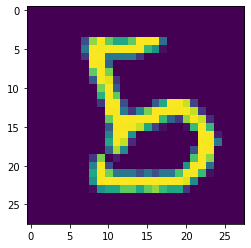

EXPECTED VALUE:  2  PREDICTED VALUE:  6


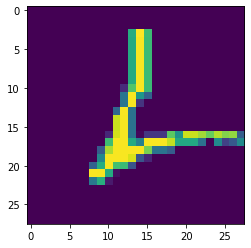

EXPECTED VALUE:  2  PREDICTED VALUE:  0


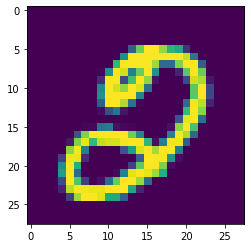

EXPECTED VALUE:  2  PREDICTED VALUE:  4


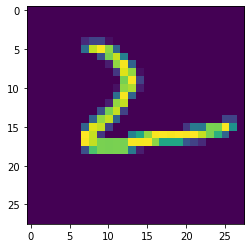

EXPECTED VALUE:  6  PREDICTED VALUE:  5


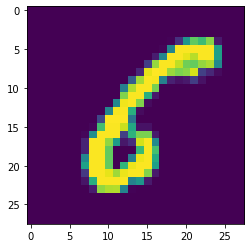

EXPECTED VALUE:  5  PREDICTED VALUE:  3


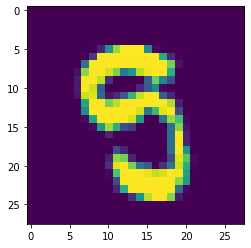

EXPECTED VALUE:  3  PREDICTED VALUE:  0


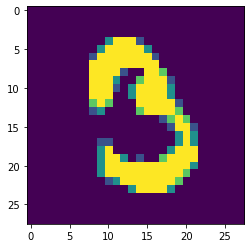

EXPECTED VALUE:  4  PREDICTED VALUE:  8


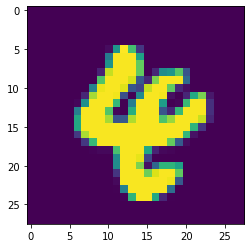

EXPECTED VALUE:  9  PREDICTED VALUE:  5


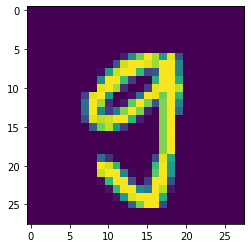

EXPECTED VALUE:  9  PREDICTED VALUE:  3


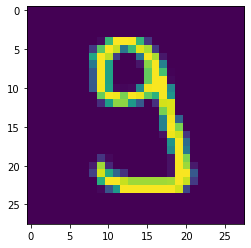

EXPECTED VALUE:  7  PREDICTED VALUE:  1


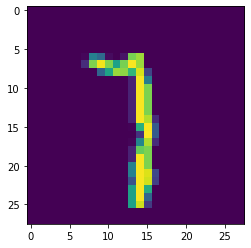

EXPECTED VALUE:  9  PREDICTED VALUE:  1


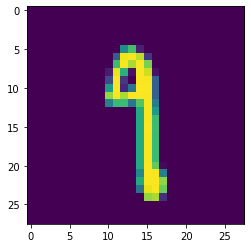

EXPECTED VALUE:  3  PREDICTED VALUE:  5


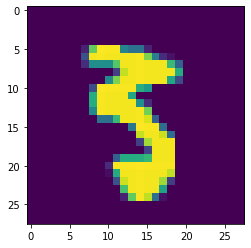

EXPECTED VALUE:  9  PREDICTED VALUE:  4


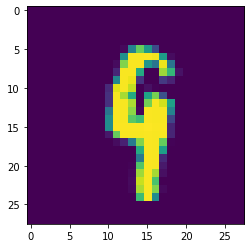

EXPECTED VALUE:  3  PREDICTED VALUE:  8


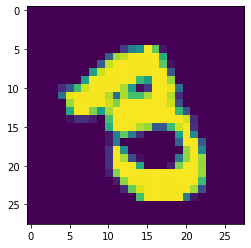

EXPECTED VALUE:  5  PREDICTED VALUE:  7


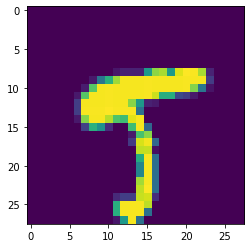

EXPECTED VALUE:  6  PREDICTED VALUE:  5


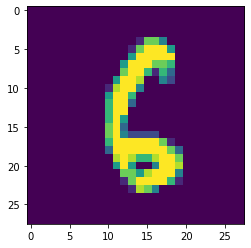

EXPECTED VALUE:  1  PREDICTED VALUE:  8


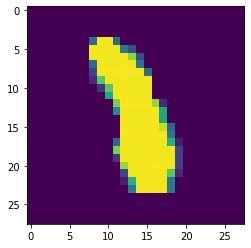

EXPECTED VALUE:  1  PREDICTED VALUE:  8


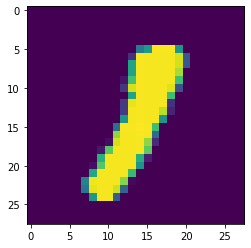

EXPECTED VALUE:  2  PREDICTED VALUE:  8


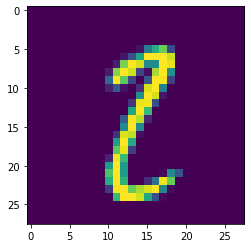

EXPECTED VALUE:  9  PREDICTED VALUE:  3


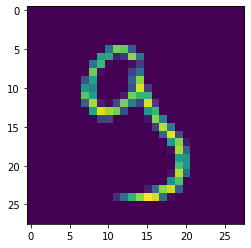

EXPECTED VALUE:  7  PREDICTED VALUE:  1


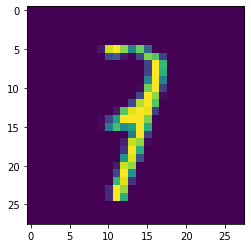

EXPECTED VALUE:  3  PREDICTED VALUE:  5


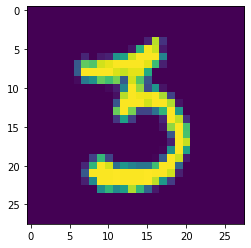

EXPECTED VALUE:  4  PREDICTED VALUE:  9


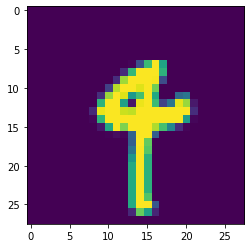

EXPECTED VALUE:  9  PREDICTED VALUE:  5


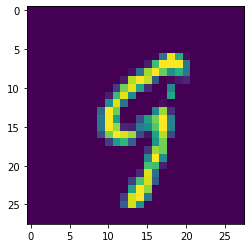

EXPECTED VALUE:  7  PREDICTED VALUE:  0


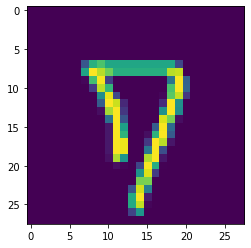

EXPECTED VALUE:  9  PREDICTED VALUE:  4


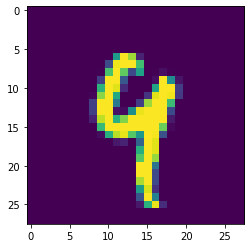

EXPECTED VALUE:  0  PREDICTED VALUE:  9


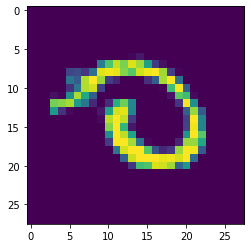

EXPECTED VALUE:  7  PREDICTED VALUE:  4


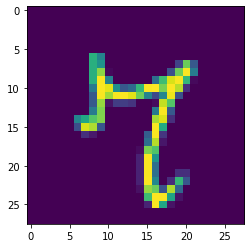

EXPECTED VALUE:  8  PREDICTED VALUE:  7


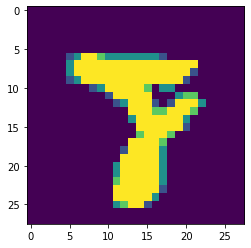

EXPECTED VALUE:  9  PREDICTED VALUE:  8


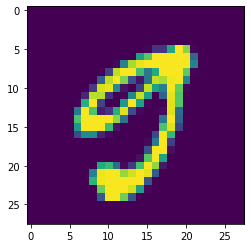

EXPECTED VALUE:  3  PREDICTED VALUE:  7


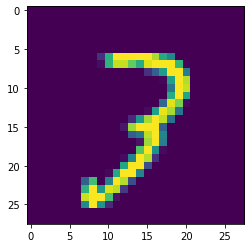

EXPECTED VALUE:  7  PREDICTED VALUE:  8


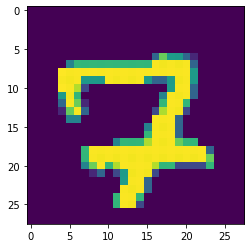

EXPECTED VALUE:  4  PREDICTED VALUE:  9


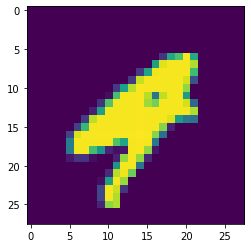

EXPECTED VALUE:  6  PREDICTED VALUE:  4


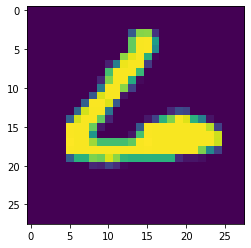

EXPECTED VALUE:  0  PREDICTED VALUE:  1


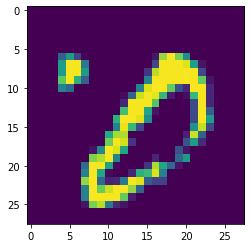

EXPECTED VALUE:  5  PREDICTED VALUE:  0


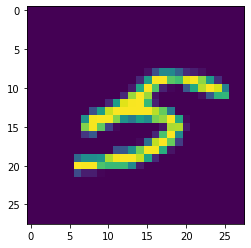

EXPECTED VALUE:  0  PREDICTED VALUE:  6


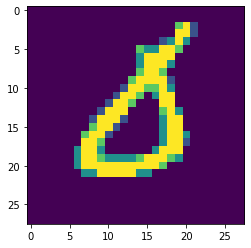

EXPECTED VALUE:  6  PREDICTED VALUE:  5


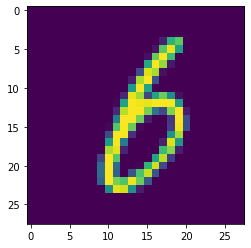

EXPECTED VALUE:  3  PREDICTED VALUE:  7


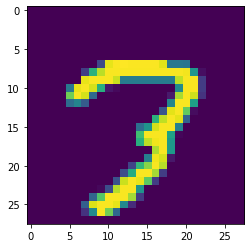

EXPECTED VALUE:  0  PREDICTED VALUE:  5


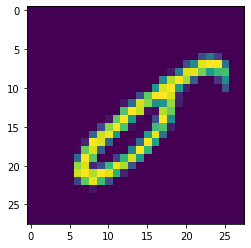

EXPECTED VALUE:  4  PREDICTED VALUE:  6


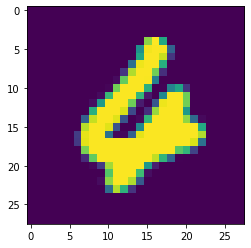

EXPECTED VALUE:  6  PREDICTED VALUE:  0


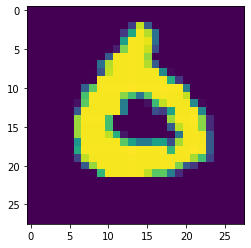

EXPECTED VALUE:  8  PREDICTED VALUE:  3


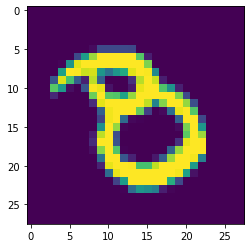

EXPECTED VALUE:  5  PREDICTED VALUE:  3


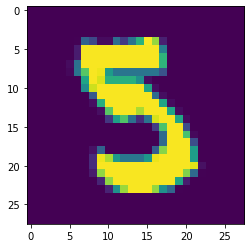

EXPECTED VALUE:  7  PREDICTED VALUE:  9


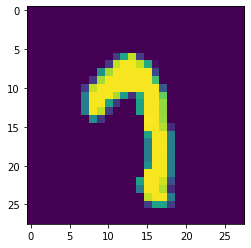

EXPECTED VALUE:  3  PREDICTED VALUE:  8


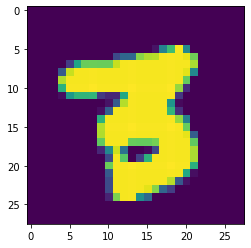

EXPECTED VALUE:  3  PREDICTED VALUE:  6


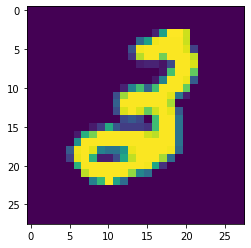

EXPECTED VALUE:  1  PREDICTED VALUE:  8


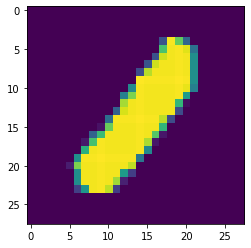

EXPECTED VALUE:  9  PREDICTED VALUE:  5


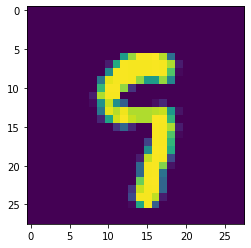

EXPECTED VALUE:  7  PREDICTED VALUE:  2


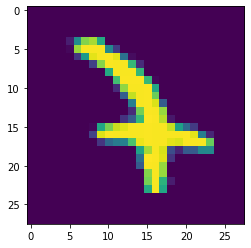

EXPECTED VALUE:  8  PREDICTED VALUE:  0


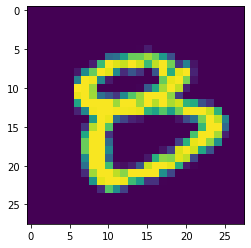

EXPECTED VALUE:  9  PREDICTED VALUE:  4


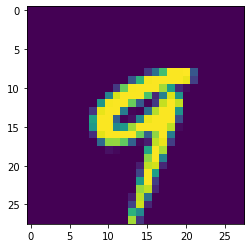

EXPECTED VALUE:  0  PREDICTED VALUE:  6


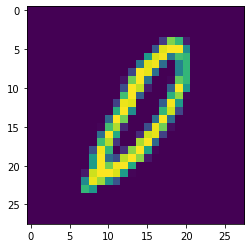

EXPECTED VALUE:  2  PREDICTED VALUE:  6


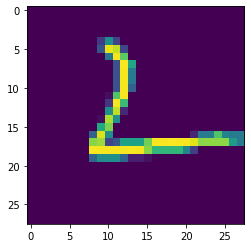

EXPECTED VALUE:  4  PREDICTED VALUE:  9


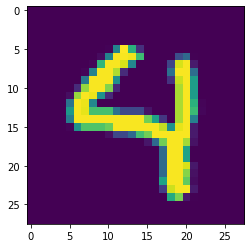

EXPECTED VALUE:  1  PREDICTED VALUE:  2


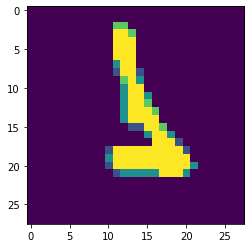

EXPECTED VALUE:  4  PREDICTED VALUE:  0


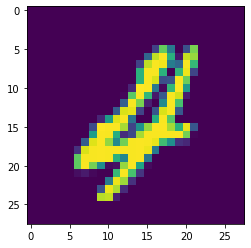

EXPECTED VALUE:  3  PREDICTED VALUE:  2


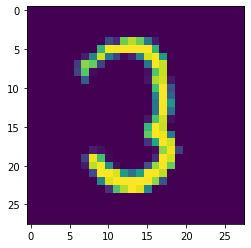

EXPECTED VALUE:  8  PREDICTED VALUE:  4


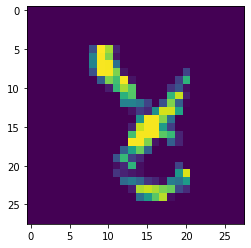

EXPECTED VALUE:  4  PREDICTED VALUE:  9


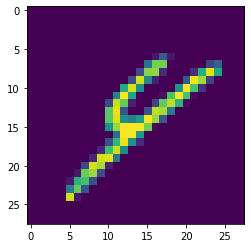

EXPECTED VALUE:  8  PREDICTED VALUE:  9


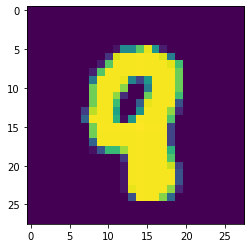

EXPECTED VALUE:  8  PREDICTED VALUE:  2


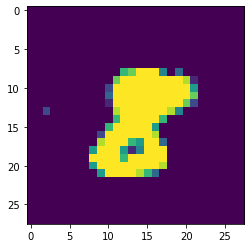

EXPECTED VALUE:  3  PREDICTED VALUE:  2


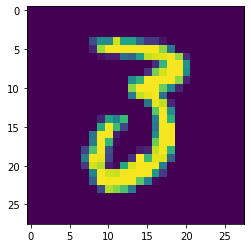

EXPECTED VALUE:  9  PREDICTED VALUE:  8


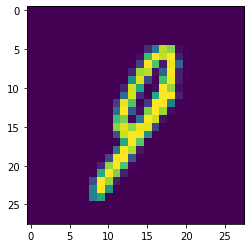

EXPECTED VALUE:  7  PREDICTED VALUE:  2


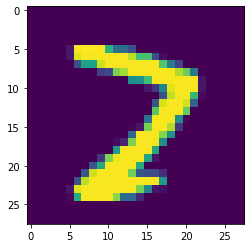

EXPECTED VALUE:  7  PREDICTED VALUE:  8


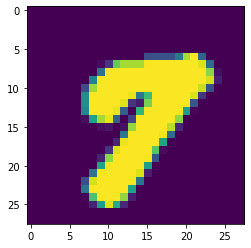

EXPECTED VALUE:  3  PREDICTED VALUE:  7


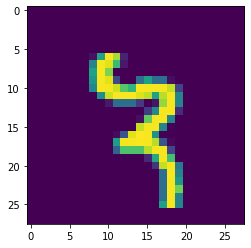

EXPECTED VALUE:  1  PREDICTED VALUE:  8


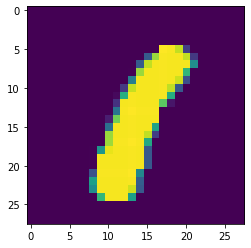

EXPECTED VALUE:  9  PREDICTED VALUE:  4


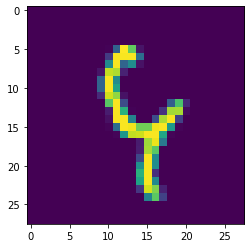

EXPECTED VALUE:  7  PREDICTED VALUE:  2


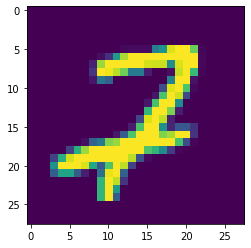

EXPECTED VALUE:  7  PREDICTED VALUE:  2


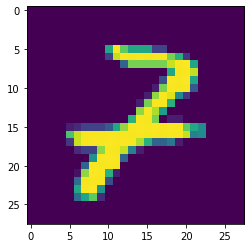

EXPECTED VALUE:  6  PREDICTED VALUE:  5


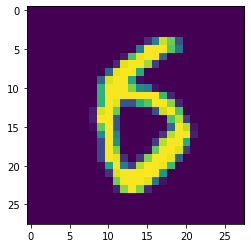

EXPECTED VALUE:  5  PREDICTED VALUE:  3


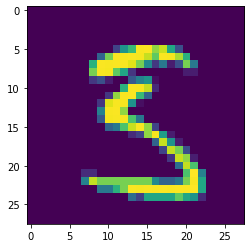

EXPECTED VALUE:  4  PREDICTED VALUE:  6


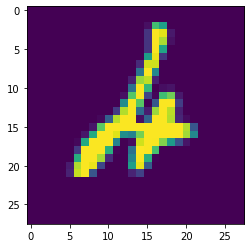

EXPECTED VALUE:  6  PREDICTED VALUE:  0


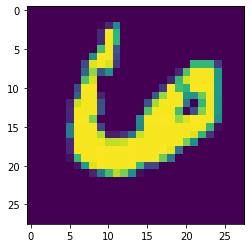

EXPECTED VALUE:  2  PREDICTED VALUE:  0


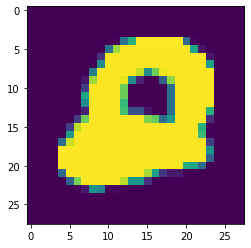

EXPECTED VALUE:  3  PREDICTED VALUE:  2


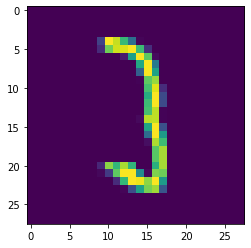

EXPECTED VALUE:  9  PREDICTED VALUE:  4


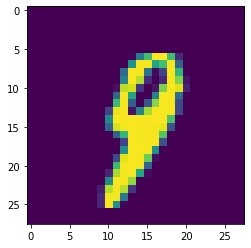

EXPECTED VALUE:  4  PREDICTED VALUE:  9


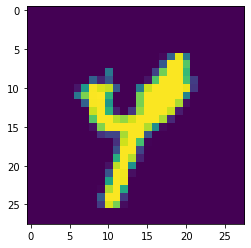

EXPECTED VALUE:  2  PREDICTED VALUE:  3


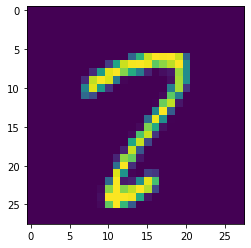

EXPECTED VALUE:  0  PREDICTED VALUE:  5


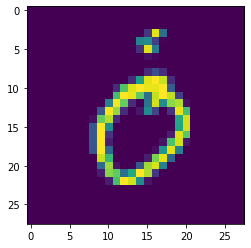

EXPECTED VALUE:  4  PREDICTED VALUE:  9


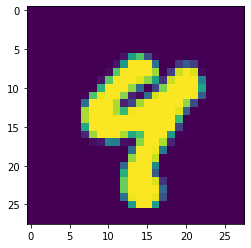

EXPECTED VALUE:  3  PREDICTED VALUE:  2


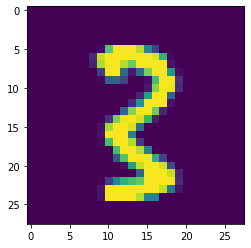

EXPECTED VALUE:  7  PREDICTED VALUE:  1


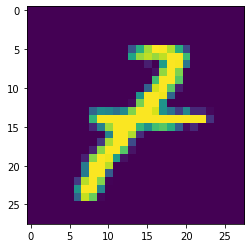

EXPECTED VALUE:  5  PREDICTED VALUE:  8


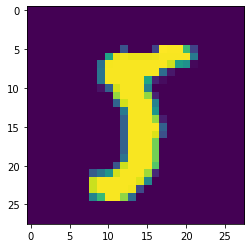

EXPECTED VALUE:  6  PREDICTED VALUE:  5


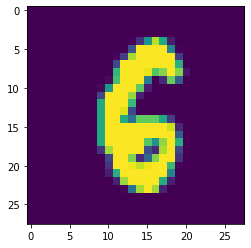

EXPECTED VALUE:  6  PREDICTED VALUE:  8


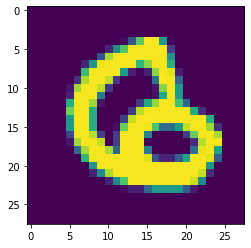

EXPECTED VALUE:  9  PREDICTED VALUE:  4


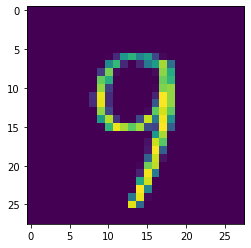

EXPECTED VALUE:  7  PREDICTED VALUE:  2


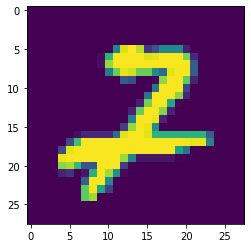

EXPECTED VALUE:  9  PREDICTED VALUE:  4


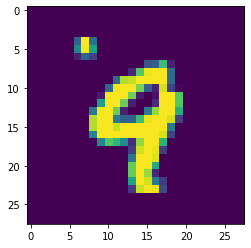

EXPECTED VALUE:  0  PREDICTED VALUE:  7


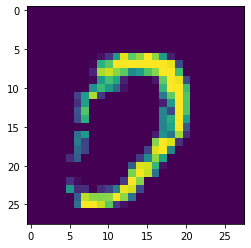

EXPECTED VALUE:  1  PREDICTED VALUE:  2


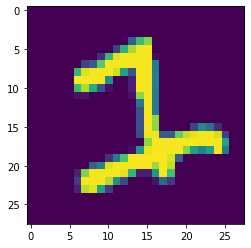

EXPECTED VALUE:  7  PREDICTED VALUE:  3


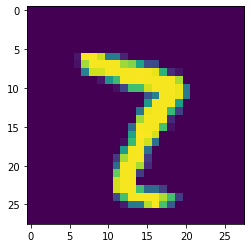

EXPECTED VALUE:  9  PREDICTED VALUE:  4


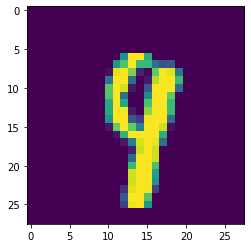

EXPECTED VALUE:  7  PREDICTED VALUE:  0


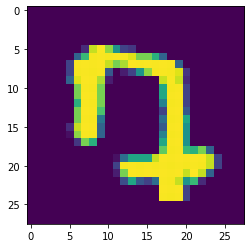

EXPECTED VALUE:  1  PREDICTED VALUE:  5


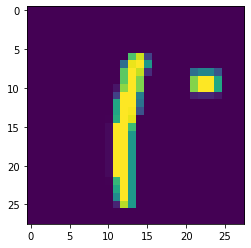

EXPECTED VALUE:  6  PREDICTED VALUE:  5


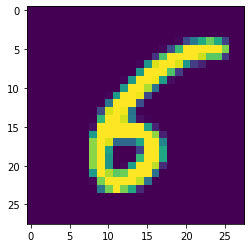

EXPECTED VALUE:  7  PREDICTED VALUE:  9


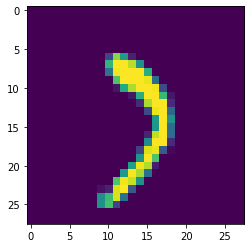

EXPECTED VALUE:  9  PREDICTED VALUE:  3


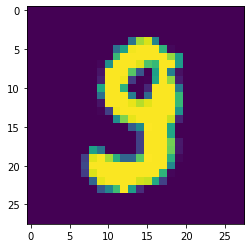

EXPECTED VALUE:  0  PREDICTED VALUE:  2


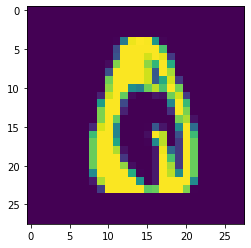

EXPECTED VALUE:  9  PREDICTED VALUE:  8


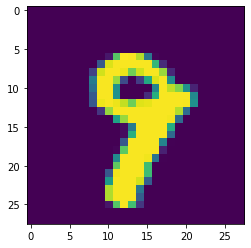

EXPECTED VALUE:  1  PREDICTED VALUE:  8


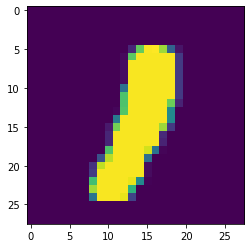

EXPECTED VALUE:  2  PREDICTED VALUE:  8


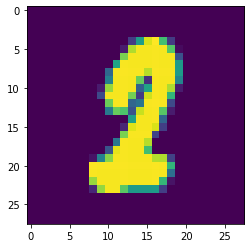

EXPECTED VALUE:  7  PREDICTED VALUE:  1


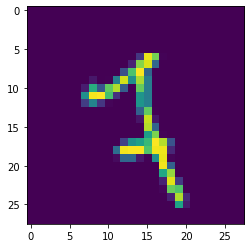

EXPECTED VALUE:  7  PREDICTED VALUE:  0


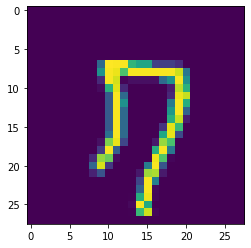

EXPECTED VALUE:  3  PREDICTED VALUE:  2


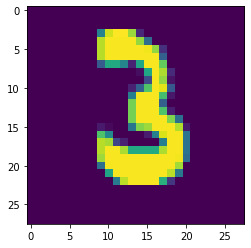

EXPECTED VALUE:  2  PREDICTED VALUE:  4


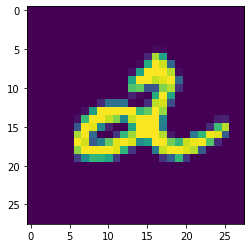

EXPECTED VALUE:  6  PREDICTED VALUE:  4


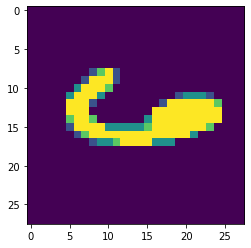

EXPECTED VALUE:  3  PREDICTED VALUE:  7


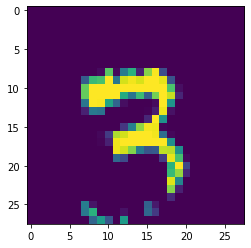

EXPECTED VALUE:  5  PREDICTED VALUE:  6


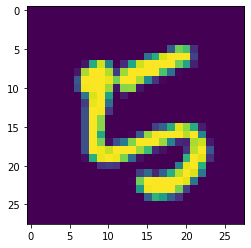

EXPECTED VALUE:  9  PREDICTED VALUE:  0


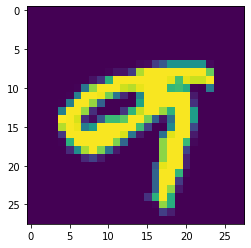

EXPECTED VALUE:  5  PREDICTED VALUE:  3


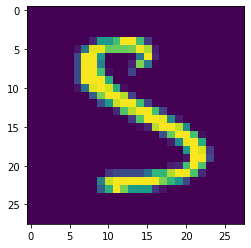

EXPECTED VALUE:  4  PREDICTED VALUE:  6


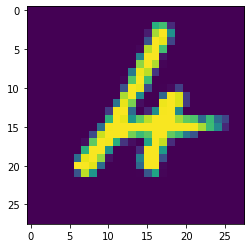

EXPECTED VALUE:  6  PREDICTED VALUE:  4


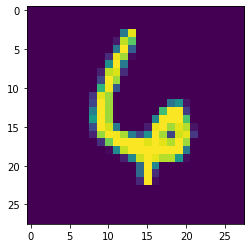

EXPECTED VALUE:  7  PREDICTED VALUE:  3


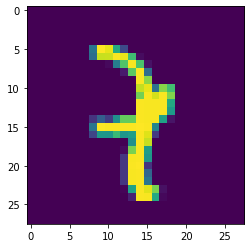

EXPECTED VALUE:  7  PREDICTED VALUE:  2


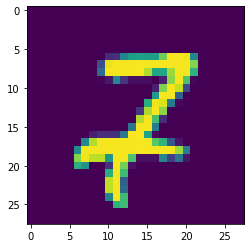

EXPECTED VALUE:  3  PREDICTED VALUE:  4


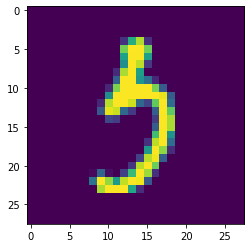

EXPECTED VALUE:  2  PREDICTED VALUE:  8


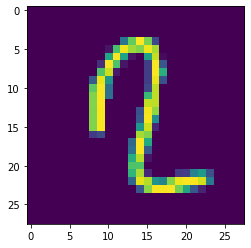

EXPECTED VALUE:  3  PREDICTED VALUE:  8


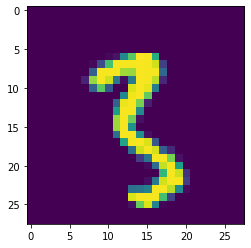

EXPECTED VALUE:  8  PREDICTED VALUE:  5


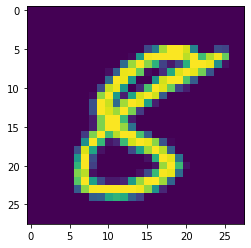

EXPECTED VALUE:  7  PREDICTED VALUE:  1


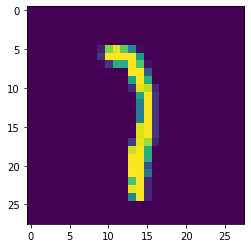

EXPECTED VALUE:  6  PREDICTED VALUE:  4


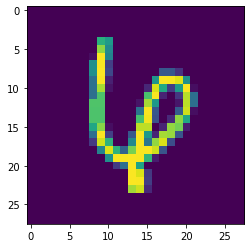

EXPECTED VALUE:  8  PREDICTED VALUE:  2


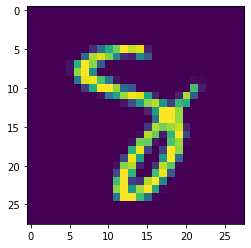

EXPECTED VALUE:  2  PREDICTED VALUE:  8


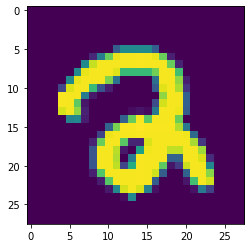

EXPECTED VALUE:  6  PREDICTED VALUE:  5


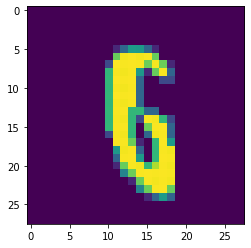

EXPECTED VALUE:  2  PREDICTED VALUE:  8


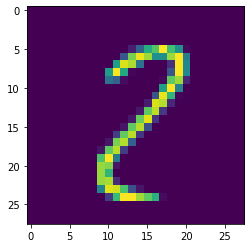

EXPECTED VALUE:  9  PREDICTED VALUE:  7


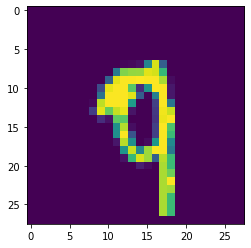

EXPECTED VALUE:  3  PREDICTED VALUE:  2


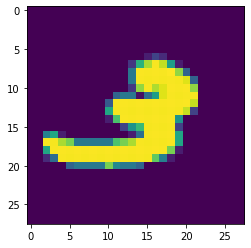

EXPECTED VALUE:  1  PREDICTED VALUE:  8


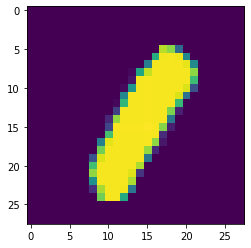

EXPECTED VALUE:  1  PREDICTED VALUE:  4


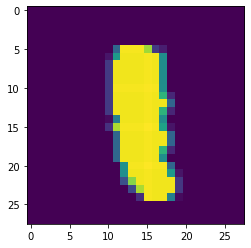

EXPECTED VALUE:  9  PREDICTED VALUE:  4


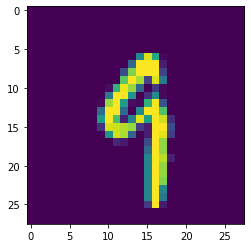

EXPECTED VALUE:  8  PREDICTED VALUE:  9


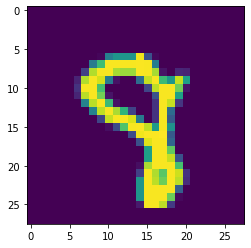

EXPECTED VALUE:  6  PREDICTED VALUE:  1


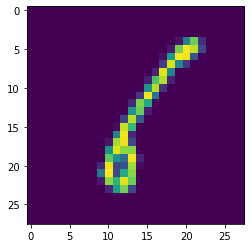

EXPECTED VALUE:  3  PREDICTED VALUE:  9


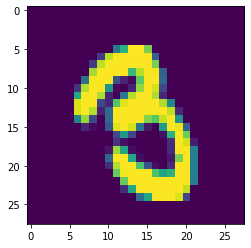

EXPECTED VALUE:  7  PREDICTED VALUE:  2


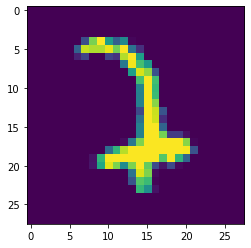

EXPECTED VALUE:  6  PREDICTED VALUE:  0


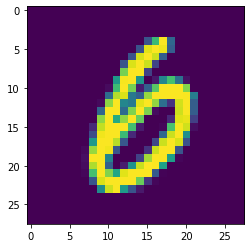

EXPECTED VALUE:  6  PREDICTED VALUE:  5


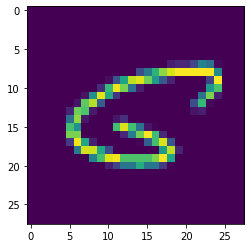

EXPECTED VALUE:  8  PREDICTED VALUE:  5


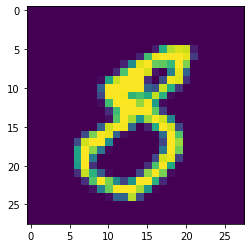

EXPECTED VALUE:  9  PREDICTED VALUE:  1


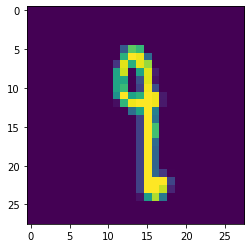

EXPECTED VALUE:  5  PREDICTED VALUE:  8


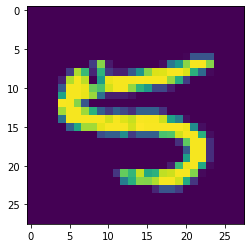

EXPECTED VALUE:  5  PREDICTED VALUE:  8


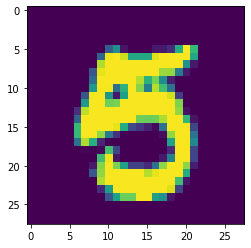

EXPECTED VALUE:  4  PREDICTED VALUE:  9


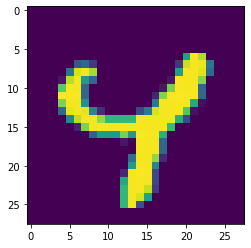

EXPECTED VALUE:  1  PREDICTED VALUE:  2


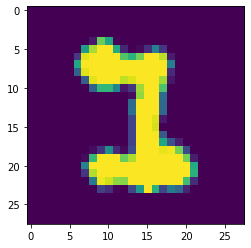

EXPECTED VALUE:  9  PREDICTED VALUE:  8


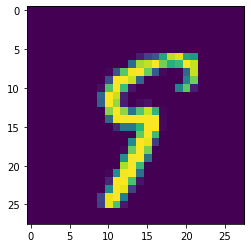

EXPECTED VALUE:  9  PREDICTED VALUE:  1


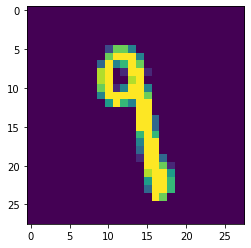

EXPECTED VALUE:  7  PREDICTED VALUE:  4


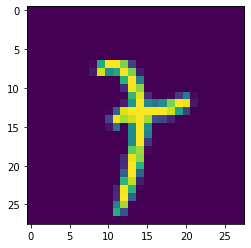

EXPECTED VALUE:  5  PREDICTED VALUE:  8


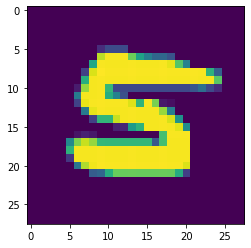

EXPECTED VALUE:  3  PREDICTED VALUE:  2


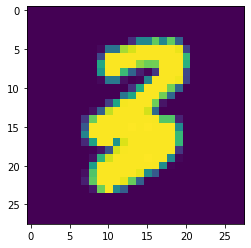

EXPECTED VALUE:  9  PREDICTED VALUE:  0


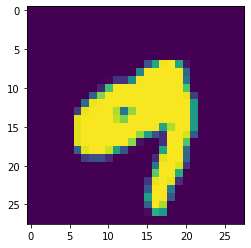

EXPECTED VALUE:  3  PREDICTED VALUE:  5


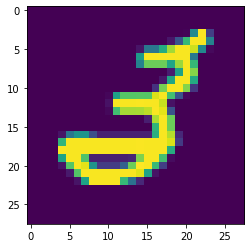

EXPECTED VALUE:  6  PREDICTED VALUE:  5


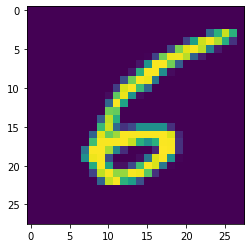

EXPECTED VALUE:  5  PREDICTED VALUE:  0


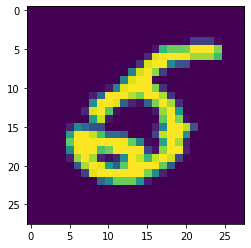

EXPECTED VALUE:  5  PREDICTED VALUE:  0


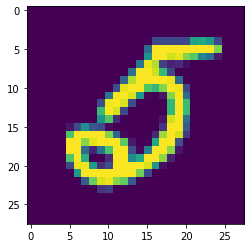

EXPECTED VALUE:  9  PREDICTED VALUE:  4


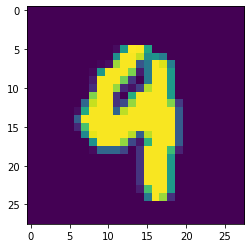

EXPECTED VALUE:  7  PREDICTED VALUE:  8


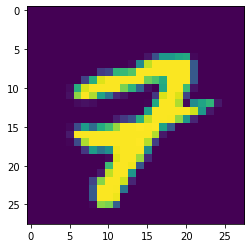

EXPECTED VALUE:  7  PREDICTED VALUE:  9


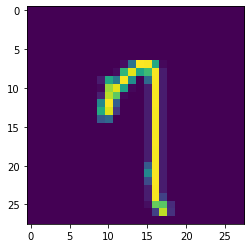

EXPECTED VALUE:  5  PREDICTED VALUE:  4


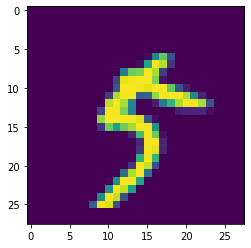

EXPECTED VALUE:  9  PREDICTED VALUE:  0


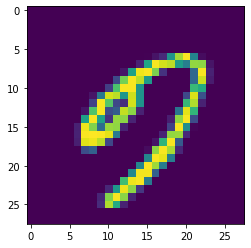

EXPECTED VALUE:  7  PREDICTED VALUE:  0


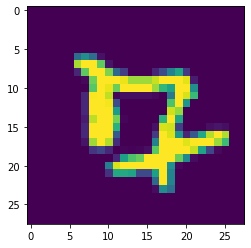

EXPECTED VALUE:  9  PREDICTED VALUE:  4


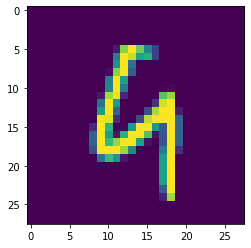

EXPECTED VALUE:  7  PREDICTED VALUE:  2


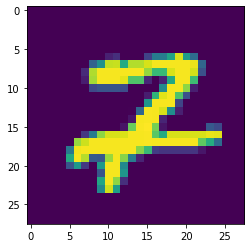

EXPECTED VALUE:  2  PREDICTED VALUE:  8


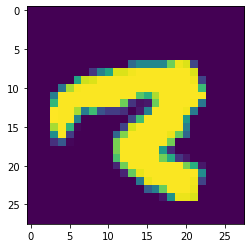

EXPECTED VALUE:  3  PREDICTED VALUE:  2


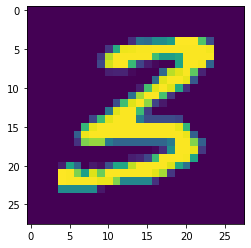

EXPECTED VALUE:  7  PREDICTED VALUE:  8


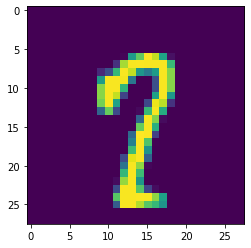

EXPECTED VALUE:  0  PREDICTED VALUE:  8


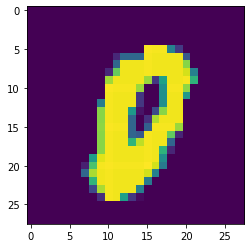

EXPECTED VALUE:  4  PREDICTED VALUE:  9


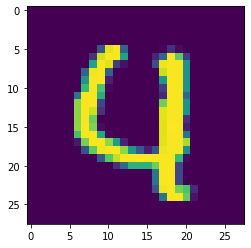

EXPECTED VALUE:  6  PREDICTED VALUE:  2


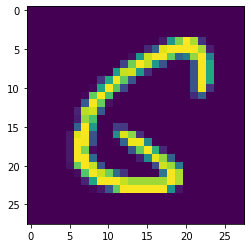

EXPECTED VALUE:  1  PREDICTED VALUE:  8


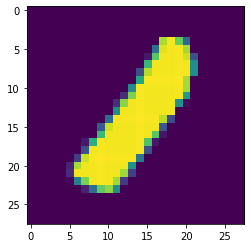

EXPECTED VALUE:  2  PREDICTED VALUE:  8


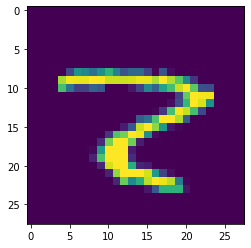

EXPECTED VALUE:  6  PREDICTED VALUE:  8


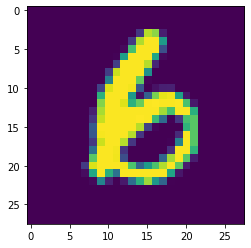

EXPECTED VALUE:  9  PREDICTED VALUE:  4


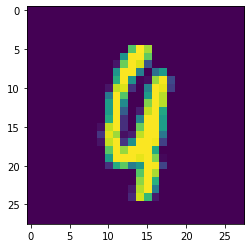

EXPECTED VALUE:  8  PREDICTED VALUE:  5


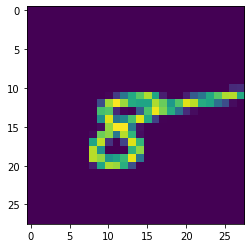

EXPECTED VALUE:  8  PREDICTED VALUE:  9


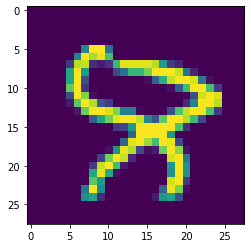

EXPECTED VALUE:  9  PREDICTED VALUE:  4


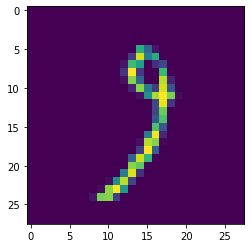

EXPECTED VALUE:  9  PREDICTED VALUE:  8


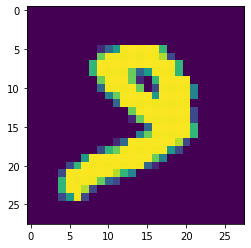

EXPECTED VALUE:  7  PREDICTED VALUE:  9


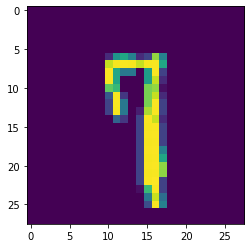

EXPECTED VALUE:  2  PREDICTED VALUE:  0


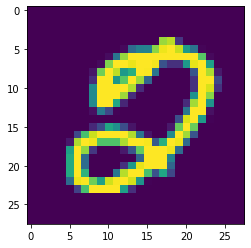

EXPECTED VALUE:  8  PREDICTED VALUE:  5


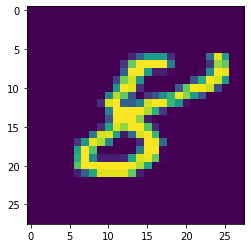

EXPECTED VALUE:  2  PREDICTED VALUE:  8


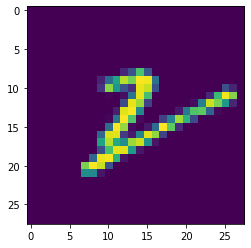

EXPECTED VALUE:  7  PREDICTED VALUE:  3


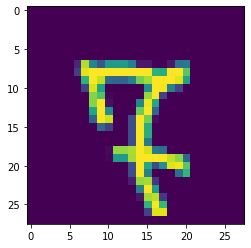

EXPECTED VALUE:  3  PREDICTED VALUE:  5


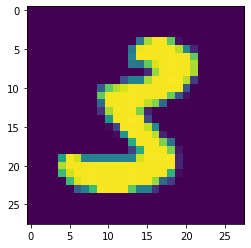

EXPECTED VALUE:  2  PREDICTED VALUE:  4


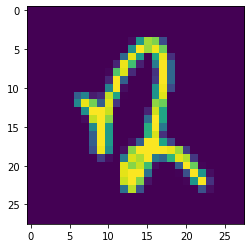

EXPECTED VALUE:  4  PREDICTED VALUE:  2


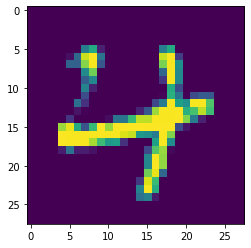

248


In [20]:
y_pred_np = y_pred[neuron_hidden_layer].numpy()
test_y_np = test_y.cpu().numpy()
counter = 0
for k in range(10000):
    if test_y_np[k] != y_pred_np[k]:
        plt.imshow(test_x[k].cpu().numpy().reshape(28,28))
        print("EXPECTED VALUE: ",test_y_np[k]," PREDICTED VALUE: ",y_pred_np[k])
        plt.show()
        counter+=1
print(counter)


In [22]:
## 2 hidden layers
Max_Ac = np.zeros(n_samples)
epoch = np.zeros(n_samples)
epochs= 20
batch_size = 50
n_samples = 20

D_in = 784
D_out= 10
D_hidden = 90
D_hidden1 = np.linspace(10, 200, n_samples)

for k in range(n_samples):
    D_hidden1_idx = int(D_hidden1[k])
    model = nn.Sequential(nn.Linear(D_in,D_hidden),
                    nn.LeakyReLU(),
                    nn.Linear(D_hidden,D_hidden1_idx),
                    nn.LeakyReLU(),
                    nn.Linear(D_hidden1_idx,D_out),
                    nn.LogSoftmax(dim=1)).cuda()
    optimizer=th.optim.Adam(model.parameters(), lr = 0.005)
    loss_fn=nn.NLLLoss()
    y_pred, Max_Ac[k], epoch[k] = train(model, optimizer, loss_fn, epochs, batch_size, train_x, train_y, test_x, test_y)


aining/Validation done
---------- Best : 97.440  at epoch  6  /  20
Epoch: 0	 train Loss: 5.53922..  valid Loss: 0.14546..  valid Accuracy: 95.870
Epoch: 1	 train Loss: 2.77601..  valid Loss: 0.14067..  valid Accuracy: 95.920
Epoch: 2	 train Loss: 2.25686..  valid Loss: 0.10481..  valid Accuracy: 96.990
Epoch: 3	 train Loss: 1.85151..  valid Loss: 0.13249..  valid Accuracy: 96.950
Epoch: 4	 train Loss: 1.85026..  valid Loss: 0.11016..  valid Accuracy: 97.180
Epoch: 5	 train Loss: 1.53301..  valid Loss: 0.13637..  valid Accuracy: 96.680
Epoch: 6	 train Loss: 1.48959..  valid Loss: 0.16936..  valid Accuracy: 96.230
Epoch: 7	 train Loss: 1.34305..  valid Loss: 0.14283..  valid Accuracy: 97.000
Epoch: 8	 train Loss: 1.40587..  valid Loss: 0.12062..  valid Accuracy: 97.190
Epoch: 9	 train Loss: 1.13086..  valid Loss: 0.12526..  valid Accuracy: 97.130
Epoch: 10	 train Loss: 1.13708..  valid Loss: 0.13589..  valid Accuracy: 97.370
Epoch: 11	 train Loss: 1.11602..  valid Loss: 0.15054..  valid

A acurácia max é 97.72 quando temos  20  neurônios na camada intermediaria


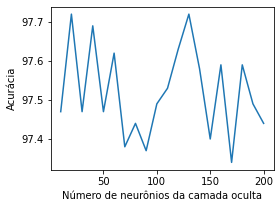

In [28]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(D_hidden1,Max_Ac)
plt.xlabel("Número de neurônios da camada oculta")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos ", 10*(np.argmax(Max_Ac)+1), " neurônios na camada intermediaria")
neuron_hidden_layer2 = np.argmax(Max_Ac)


In [30]:

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_y.cpu(),y_pred[neuron_hidden_layer2])
display(confusion_matrix)

array([[ 960,    1,    2,    0,    0,    1,    9,    2,    2,    3],
       [   0, 1120,    1,    2,    0,    2,    1,    2,    7,    0],
       [   3,    1,  997,    2,    3,    0,    4,   17,    4,    1],
       [   0,    0,   10,  977,    0,    7,    1,    6,    7,    2],
       [   0,    1,    4,    0,  926,    0,   11,    4,    5,   31],
       [   2,    0,    0,   38,    1,  830,    8,    1,    6,    6],
       [   5,    3,    0,    1,    2,    4,  937,    1,    5,    0],
       [   0,    4,   13,    5,    0,    0,    0,  994,    4,    8],
       [   3,    0,    2,    4,    3,    3,    3,    3,  939,   14],
       [   3,    3,    1,    3,    7,    4,    0,    7,    2,  979]],
      dtype=int64)

In [33]:
sum = 0
for k in range(10):
    sum = sum+confusion_matrix[k,k]
display(sum/10000)

0.9659

Text(0.5, 15.0, 'Predicted label')

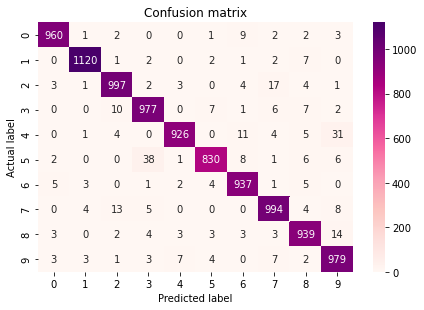

In [26]:
# Confusion matrix for D_hidden = 150
class_names = ["0","1","2","3","4","5","6","8","9"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Creating a visual confusion matrix in a heatmap form
sns.heatmap(pd.DataFrame(confusion_matrix), cmap="RdPu", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
## 3 hidden layers

epochs= 20
batch_size = 50
n_samples = 20
Max_Ac = np.zeros(n_samples)
epoch = np.zeros(n_samples)
## model
D_in = 784
D_out= 10
D_hidden = 90
D_hidden1 = 20
D_hidden2 = np.linspace(10, 200, n_samples)

for k in range(n_samples):
    D_hidden2_idx = int(D_hidden2[k])
    model = nn.Sequential(nn.Linear(D_in,D_hidden),
                        nn.LeakyReLU(),
                        nn.Linear(D_hidden,D_hidden1),
                        nn.LeakyReLU(),
                        nn.Linear(D_hidden1,D_hidden2_idx),
                        nn.LeakyReLU(),
                        nn.Linear(D_hidden2_idx,D_out),
                        nn.LogSoftmax(dim=1)).cuda()
    optimizer=th.optim.Adam(model.parameters(), lr = 0.005)
    loss_fn=nn.NLLLoss()
    y_pred, Max_Ac[k], epoch[k] = train(model, optimizer, loss_fn, epochs, batch_size, train_x, train_y, test_x, test_y)

ining/Validation done
---------- Best : 97.400  at epoch  16  /  20
Epoch: 0	 train Loss: 6.64194..  valid Loss: 0.18237..  valid Accuracy: 94.640
Epoch: 1	 train Loss: 3.25923..  valid Loss: 0.14095..  valid Accuracy: 96.040
Epoch: 2	 train Loss: 2.58205..  valid Loss: 0.12151..  valid Accuracy: 96.470
Epoch: 3	 train Loss: 2.21919..  valid Loss: 0.11174..  valid Accuracy: 97.000
Epoch: 4	 train Loss: 1.94487..  valid Loss: 0.14179..  valid Accuracy: 96.340
Epoch: 5	 train Loss: 1.75961..  valid Loss: 0.10782..  valid Accuracy: 97.240
Epoch: 6	 train Loss: 1.64993..  valid Loss: 0.10312..  valid Accuracy: 97.190
Epoch: 7	 train Loss: 1.49353..  valid Loss: 0.11319..  valid Accuracy: 97.560
Epoch: 8	 train Loss: 1.44197..  valid Loss: 0.12628..  valid Accuracy: 97.010
Epoch: 9	 train Loss: 1.34998..  valid Loss: 0.10483..  valid Accuracy: 97.360
Epoch: 10	 train Loss: 1.29614..  valid Loss: 0.11719..  valid Accuracy: 97.470
Epoch: 11	 train Loss: 1.11365..  valid Loss: 0.14340..  valid

A acurácia max é 97.83 quando temos  120  neurônios na camada intermediaria


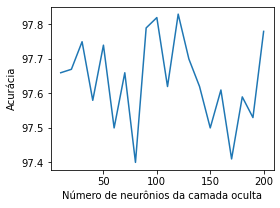

In [12]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(D_hidden2,Max_Ac)
plt.xlabel("Número de neurônios da camada oculta")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos ", 10*(np.argmax(Max_Ac)+1), " neurônios na camada intermediaria")
neuron_hidden_layer3 = np.argmax(Max_Ac)

In [15]:
neuron_hidden_layer3

11

In [17]:
display(D_hidden2[neuron_hidden_layer3])
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_y.cpu(),y_pred[9])
display(confusion_matrix)

120.0

array([[ 968,    1,    0,    0,    1,    0,    5,    1,    2,    2],
       [   0, 1124,    4,    1,    0,    1,    2,    0,    3,    0],
       [   3,    3,  994,    6,    0,    0,    4,   15,    6,    1],
       [   0,    0,    4,  986,    0,    2,    0,    5,    7,    6],
       [   0,    2,    3,    0,  941,    0,    5,    5,    0,   26],
       [   3,    2,    0,   18,    1,  843,   10,    2,    7,    6],
       [   2,    1,    0,    0,    6,    5,  943,    0,    1,    0],
       [   2,    2,    8,    3,    1,    0,    0, 1010,    1,    1],
       [   1,    1,    1,    3,    4,    7,    2,    5,  940,   10],
       [   2,    2,    0,    1,    4,    3,    0,   15,    1,  981]],
      dtype=int64)

Text(0.5, 15.0, 'Predicted label')

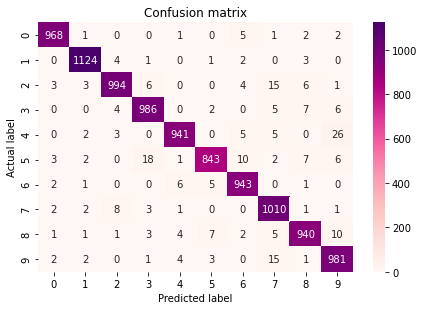

In [18]:
# Confusion matrix for D_hidden = 150
class_names = ["0","1","2","3","4","5","6","8","9"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Creating a visual confusion matrix in a heatmap form
sns.heatmap(pd.DataFrame(confusion_matrix), cmap="RdPu", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Exercicio 2-b)

In [81]:
#Let's use the data below:
display(trainconv_x.shape)
display(trainconv_y.shape)
display(testconv_x.shape)
display(testconv_y.shape)


torch.Size([60000, 1, 28, 28])

torch.Size([60000])

torch.Size([10000, 1, 28, 28])

torch.Size([10000])

In [82]:
# 1 Conv2D Layer + MaxPooling
epochs = 50
batch_size = 50

n_samples = 9
kernel = np.linspace(2, 18, n_samples) #changing kernel size
Max_Ac = np.zeros(n_samples)

for i in range(n_samples):

    pad = i%2

    #CONV1
    in_channel_1 = 1
    Hin_ch_conv_1 = 28
    Win_ch_conv_1 = 28
    kH_conv_1 = int(kernel[i])
    stH_conv_1 = 2
    padH_conv_1 = int(2 + pad)
    kW_conv_1 = int(kernel[i])
    stW_conv_1 = 2
    padW_conv_1 = int(2 + pad)
    Hout_ch_conv_1 = (Hin_ch_conv_1+2*padH_conv_1-(kH_conv_1-1)-1)/stH_conv_1+1
    Wout_ch_conv_1 = (Win_ch_conv_1+2*padW_conv_1-(kW_conv_1-1)-1)/stW_conv_1+1
    out_channel_1 = 5

    #MAXPOOL1
    kH_pool_1= 4
    stH_pool_1= 2
    kW_pool_1= 4
    stW_pool_1= 2
    Hin_ch_conv_2 = (Hout_ch_conv_1 - kH_pool_1)/stH_pool_1 + 1
    Win_ch_conv_2 = (Wout_ch_conv_1 - kW_pool_1)/stW_pool_1 + 1

    #LINEAR_1
    in_lin = int(Hin_ch_conv_2*Win_ch_conv_2*out_channel_1)
    out_lin = 10
    #print(Hout_ch_conv_1)
    #print(Wout_ch_conv_1)
    #print(Hin_ch_conv_2)
    #print(Win_ch_conv_2)
    #print(in_lin)
    #print(out_lin)

    model = th.nn.Sequential(
                    nn.Conv2d(in_channel_1,out_channel_1,kernel_size=(kH_conv_1,kW_conv_1),stride=(stH_conv_1,stW_conv_1),padding=(padH_conv_1,padW_conv_1)),
                    nn.LeakyReLU(),
                    nn.MaxPool2d(kernel_size=(kH_pool_1,kW_pool_1),stride=(stH_pool_1,stW_pool_1)),
                    nn.Flatten(),
                    nn.Dropout(),                               
                    nn.Linear(in_lin,out_lin),                       
                    nn.LogSoftmax(dim=1)
                    ).cuda()
    optimizer=th.optim.Adam(model.parameters(),lr=0.005)
    loss_fn=nn.NLLLoss()
    y_pred, Max_Ac[i], epoch = train(model, optimizer, loss_fn, epochs, batch_size, trainconv_x, trainconv_y, testconv_x, testconv_y)

valid Loss: 0.23415..  valid Accuracy: 92.710
Epoch: 5	 train Loss: 6.23232..  valid Loss: 0.25576..  valid Accuracy: 92.240
Epoch: 6	 train Loss: 5.95737..  valid Loss: 0.24660..  valid Accuracy: 92.390
Epoch: 7	 train Loss: 5.87478..  valid Loss: 0.22088..  valid Accuracy: 93.350
Epoch: 8	 train Loss: 5.84434..  valid Loss: 0.22704..  valid Accuracy: 93.340
Epoch: 9	 train Loss: 5.82304..  valid Loss: 0.22416..  valid Accuracy: 93.160
Epoch: 10	 train Loss: 5.75018..  valid Loss: 0.22406..  valid Accuracy: 92.870
Epoch: 11	 train Loss: 5.62794..  valid Loss: 0.21565..  valid Accuracy: 93.010
Epoch: 12	 train Loss: 5.75036..  valid Loss: 0.22662..  valid Accuracy: 93.150
Epoch: 13	 train Loss: 5.73663..  valid Loss: 0.21484..  valid Accuracy: 93.620
Epoch: 14	 train Loss: 5.69198..  valid Loss: 0.24571..  valid Accuracy: 92.090
Epoch: 15	 train Loss: 5.73446..  valid Loss: 0.21745..  valid Accuracy: 93.070
Epoch: 16	 train Loss: 5.67635..  valid Loss: 0.21919..  valid Accuracy: 93.240

A acurácia max é 94.09 quando temos kernel_size =  8.0


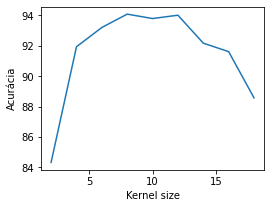

In [83]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(kernel, Max_Ac)
plt.xlabel("Kernel size")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos kernel_size = ", kernel[np.argmax(Max_Ac)])
best_kernel_size = kernel[np.argmax(Max_Ac)]

In [84]:
# 1 Conv2D Layer + MaxPooling
epochs = 50
batch_size = 50

n_samples = 20
n_kernel = np.linspace(1, 20, n_samples)
Max_Ac = np.zeros(n_samples)

for i in range(n_samples):

    #CONV1
    in_channel_1 = 1
    Hin_ch_conv_1 = 28
    Win_ch_conv_1 = 28
    kH_conv_1 = 6
    stH_conv_1 = 2
    padH_conv_1 = 2
    kW_conv_1 = 6
    stW_conv_1 = 2
    padW_conv_1 = 2
    Hout_ch_conv_1 = (Hin_ch_conv_1+2*padH_conv_1-(kH_conv_1-1)-1)/stH_conv_1+1
    Wout_ch_conv_1 = (Win_ch_conv_1+2*padW_conv_1-(kW_conv_1-1)-1)/stW_conv_1+1
    out_channel_1 = int(n_kernel[i])

    #MAXPOOL1
    kH_pool_1= 4
    stH_pool_1= 2
    kW_pool_1= 4
    stW_pool_1= 2
    Hin_ch_conv_2 = (Hout_ch_conv_1 - kH_pool_1)/stH_pool_1 + 1
    Win_ch_conv_2 = (Wout_ch_conv_1 - kW_pool_1)/stW_pool_1 + 1

    #LINEAR_1
    in_lin = int(Hin_ch_conv_2*Win_ch_conv_2*out_channel_1)
    out_lin = 10
    #print(Hout_ch_conv_1)
    #print(Wout_ch_conv_1)
    #print(Hin_ch_conv_2)
    #print(Win_ch_conv_2)
    #print(in_lin)
    #print(out_lin)

    model = th.nn.Sequential(
                nn.Conv2d(in_channel_1,out_channel_1,kernel_size=(kH_conv_1,kW_conv_1),stride=(stH_conv_1,stW_conv_1),padding=(padH_conv_1,padW_conv_1)),
                nn.LeakyReLU(),
                nn.MaxPool2d(kernel_size=(kH_pool_1,kW_pool_1),stride=(stH_pool_1,stW_pool_1)),
                nn.Flatten(),
                nn.Dropout(),                               
                nn.Linear(in_lin,out_lin),                       
                nn.LogSoftmax(dim=1)).cuda()
    optimizer=th.optim.Adam(model.parameters(),lr=0.005)
    loss_fn=nn.NLLLoss()
    y_pred, Max_Ac[i], epoch = train(model, optimizer, loss_fn, epochs, batch_size, trainconv_x, trainconv_y, testconv_x, testconv_y)

cy: 96.650
Epoch: 4	 train Loss: 2.76599..  valid Loss: 0.11223..  valid Accuracy: 96.780
Epoch: 5	 train Loss: 2.66209..  valid Loss: 0.11202..  valid Accuracy: 96.640
Epoch: 6	 train Loss: 2.70503..  valid Loss: 0.10099..  valid Accuracy: 96.860
Epoch: 7	 train Loss: 2.69606..  valid Loss: 0.11454..  valid Accuracy: 96.680
Epoch: 8	 train Loss: 2.60454..  valid Loss: 0.11363..  valid Accuracy: 96.680
Epoch: 9	 train Loss: 2.67718..  valid Loss: 0.11369..  valid Accuracy: 96.630
Epoch: 10	 train Loss: 2.61988..  valid Loss: 0.09459..  valid Accuracy: 97.080
Epoch: 11	 train Loss: 2.64890..  valid Loss: 0.10387..  valid Accuracy: 96.970
Epoch: 12	 train Loss: 2.60343..  valid Loss: 0.10753..  valid Accuracy: 96.480
Epoch: 13	 train Loss: 2.60432..  valid Loss: 0.12044..  valid Accuracy: 96.380
Epoch: 14	 train Loss: 2.69558..  valid Loss: 0.11447..  valid Accuracy: 96.570
Epoch: 15	 train Loss: 2.58511..  valid Loss: 0.11382..  valid Accuracy: 96.700
Epoch: 16	 train Loss: 2.55669..  v

In [28]:
y_pred[4]

tensor([3, 9, 4,  ..., 9, 9, 6])

A acurácia max é 97.46 quando temos n_kernel =  20.0


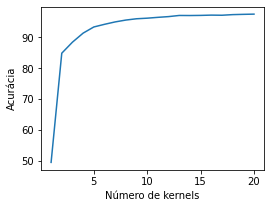

In [85]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(n_kernel, Max_Ac)
plt.xlabel("Número de kernels")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos n_kernel = ", n_kernel[np.argmax(Max_Ac)])
best_n_kernel = n_kernel[np.argmax(Max_Ac)]

### Exercicio 2-c)

In [86]:
# 1 Conv2D Layer + MaxPooling
epochs = 50
batch_size = 50

#CONV1
in_channel_1 = 1
Hin_ch_conv_1 = 28
Win_ch_conv_1 = 28
kH_conv_1 = 6
stH_conv_1 = 2
padH_conv_1 = 2
kW_conv_1 = 6
stW_conv_1 = 2
padW_conv_1 = 2
Hout_ch_conv_1 = (Hin_ch_conv_1+2*padH_conv_1-(kH_conv_1-1)-1)/stH_conv_1+1
Wout_ch_conv_1 = (Win_ch_conv_1+2*padW_conv_1-(kW_conv_1-1)-1)/stW_conv_1+1
out_channel_1 = 20

#MAXPOOL1
kH_pool_1= 4
stH_pool_1= 2
kW_pool_1= 4
stW_pool_1= 2
Hin_ch_conv_2 = (Hout_ch_conv_1 - kH_pool_1)/stH_pool_1 + 1
Win_ch_conv_2 = (Wout_ch_conv_1 - kW_pool_1)/stW_pool_1 + 1

#LINEAR_1
in_lin = int(Hin_ch_conv_2*Win_ch_conv_2*out_channel_1)
out_lin = 10
#print(Hout_ch_conv_1)
#print(Wout_ch_conv_1)
#print(Hin_ch_conv_2)
#print(Win_ch_conv_2)
#print(in_lin)
#print(out_lin)

model = th.nn.Sequential(
            nn.Conv2d(in_channel_1,out_channel_1,kernel_size=(kH_conv_1,kW_conv_1),stride=(stH_conv_1,stW_conv_1),padding=(padH_conv_1,padW_conv_1)),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=(kH_pool_1,kW_pool_1),stride=(stH_pool_1,stW_pool_1)),
            nn.Flatten(),
            nn.Dropout(),                               
            nn.Linear(in_lin,out_lin),                       
            nn.LogSoftmax(dim=1)).cuda()
optimizer=th.optim.Adam(model.parameters(),lr=0.005)
loss_fn=nn.NLLLoss()
y_pred, Max_Ac, epoch = train(model, optimizer, loss_fn, epochs, batch_size, trainconv_x, trainconv_y, testconv_x, testconv_y)

Epoch: 0	 train Loss: 5.29747..  valid Loss: 0.11520..  valid Accuracy: 96.240
Epoch: 1	 train Loss: 3.00975..  valid Loss: 0.10583..  valid Accuracy: 96.610
Epoch: 2	 train Loss: 2.77743..  valid Loss: 0.12581..  valid Accuracy: 96.040
Epoch: 3	 train Loss: 2.61365..  valid Loss: 0.11409..  valid Accuracy: 96.320
Epoch: 4	 train Loss: 2.46120..  valid Loss: 0.10176..  valid Accuracy: 96.970
Epoch: 5	 train Loss: 2.52385..  valid Loss: 0.10065..  valid Accuracy: 96.640
Epoch: 6	 train Loss: 2.47523..  valid Loss: 0.10478..  valid Accuracy: 96.960
Epoch: 7	 train Loss: 2.44599..  valid Loss: 0.10457..  valid Accuracy: 97.010
Epoch: 8	 train Loss: 2.41793..  valid Loss: 0.11211..  valid Accuracy: 96.800
Epoch: 9	 train Loss: 2.46700..  valid Loss: 0.10607..  valid Accuracy: 96.730
Epoch: 10	 train Loss: 2.34552..  valid Loss: 0.09880..  valid Accuracy: 97.270
Epoch: 11	 train Loss: 2.41846..  valid Loss: 0.08994..  valid Accuracy: 97.320
Epoch: 12	 train Loss: 2.36260..  valid Loss: 0.09

array([[ 963,    0,    0,    1,    0,    0,    7,    1,    6,    2],
       [   2, 1127,    2,    1,    0,    0,    0,    0,    2,    1],
       [   3,    6,  994,    1,    4,    0,    2,   21,    1,    0],
       [   0,    1,    3,  988,    1,    8,    0,    6,    2,    1],
       [   0,    5,    2,    1,  944,    0,    4,    6,    3,   17],
       [   2,    0,    0,    6,    1,  869,    2,    1,    9,    2],
       [   6,    4,    1,    0,    2,    4,  931,    0,    9,    1],
       [   0,    7,   10,    1,    0,    1,    0, 1004,    1,    4],
       [  10,    1,    4,    4,    4,    8,    1,    3,  926,   13],
       [   2,    0,    1,    1,    8,    4,    0,   20,    7,  966]],
      dtype=int64)

Text(0.5, 15.0, 'Predicted label')

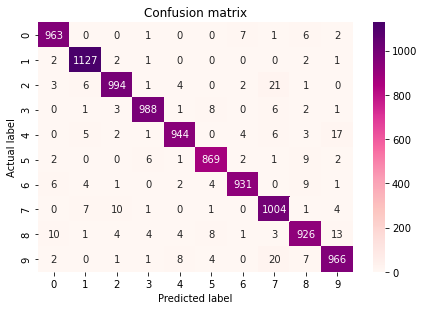

In [87]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_y.cpu(),y_pred[40])
display(confusion_matrix)
# Confusion matrix
class_names = ["0","1","2","3","4","5","6","8","9"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Creating a visual confusion matrix in a heatmap form
sns.heatmap(pd.DataFrame(confusion_matrix), cmap="RdPu", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

EXPECTED VALUE:  8  PREDICTED VALUE:  3


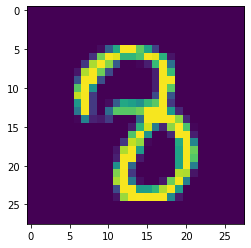

EXPECTED VALUE:  4  PREDICTED VALUE:  7


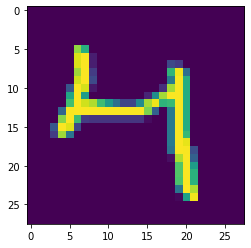

EXPECTED VALUE:  4  PREDICTED VALUE:  8


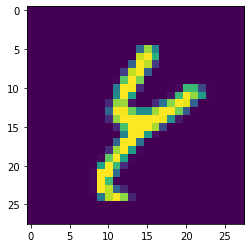

EXPECTED VALUE:  5  PREDICTED VALUE:  2


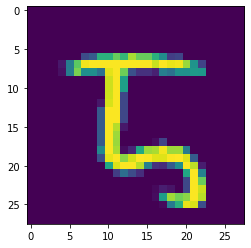

4


In [88]:
y_pred_np = y_pred[4].numpy()
test_y_np = test_y.cpu().numpy()
counter = 0
for k in range(100):
    if test_y_np[k] != y_pred_np[k]:
        plt.imshow(test_x[k].cpu().numpy().reshape(28,28))
        print("EXPECTED VALUE: ",test_y_np[k]," PREDICTED VALUE: ",y_pred_np[k])
        plt.show()
        counter+=1
print(counter)

### Exercicio 2-d)

In [89]:
# 3 Conv2D's + 3 MaxPooling
epochs = 5
batch_size = 50

#CONV1
in_channel_1 = 1
Hin_ch_conv_1 = 28
Win_ch_conv_1 = 28

kH_conv_1 = 4
stH_conv_1 = 1
padH_conv_1 = 1

kW_conv_1 = 4
stW_conv_1 = 1
padW_conv_1 = 1

Hout_ch_conv_1 = (Hin_ch_conv_1+2*padH_conv_1-(kH_conv_1-1)-1)/stH_conv_1+1
Wout_ch_conv_1 = (Win_ch_conv_1+2*padW_conv_1-(kW_conv_1-1)-1)/stW_conv_1+1
out_channel_1 = 10

#MAXPOOL1
kH_pool_1= 4
stH_pool_1= 1

kW_pool_1= 4
stW_pool_1= 1

Hin_ch_conv_2 = (Hout_ch_conv_1 - kH_pool_1)/stH_pool_1 + 1
Win_ch_conv_2 = (Wout_ch_conv_1 - kW_pool_1)/stW_pool_1 + 1

#CONV2
in_channel_2 = out_channel_1

kH_conv_2 = 4
stH_conv_2 = 2
padH_conv_2 = 2

kW_conv_2 = 4
stW_conv_2 = 2
padW_conv_2 = 2

Hout_ch_conv_2 = (Hin_ch_conv_2+2*padH_conv_2-(kH_conv_2-1)-1)/stH_conv_2+1
Wout_ch_conv_2 = (Win_ch_conv_2+2*padW_conv_2-(kW_conv_2-1)-1)/stW_conv_2+1
out_channel_2 = 15


#MAXPOOL2

kH_pool_2= 4
stH_pool_2= 1

kW_pool_2= 4
stW_pool_2= 1

Hin_ch_conv_3 = (Hout_ch_conv_2 - kH_pool_2)/stH_pool_2 + 1
Win_ch_conv_3 = (Wout_ch_conv_2 - kW_pool_2)/stW_pool_2 + 1

#CONV3
in_channel_3 = out_channel_2

kH_conv_3 = 5
stH_conv_3 = 1
padH_conv_3 = 2

kW_conv_3 = 5
stW_conv_3 = 1
padW_conv_3 = 2

Hout_ch_conv_3 = (Hin_ch_conv_3+2*padH_conv_3-(kH_conv_3-1)-1)/stH_conv_3+1
Wout_ch_conv_3 = (Win_ch_conv_3+2*padW_conv_3-(kW_conv_3-1)-1)/stW_conv_3+1
out_channel_3 = 20


#MAXPOOL3

kH_pool_3 = 4
stH_pool_3 = 2

kW_pool_3 = 4
stW_pool_3 = 2

Hin_ch_conv_4 = (Hout_ch_conv_3 - kH_pool_3)/stH_pool_3 + 1
Win_ch_conv_4 = (Wout_ch_conv_3 - kW_pool_3)/stW_pool_3 + 1


#LINEAR_1

in_lin = int(Hin_ch_conv_4*Win_ch_conv_4*out_channel_3)
hidden_lin = int(in_lin/2)
out_lin = 10

print(Hout_ch_conv_1)
print(Wout_ch_conv_1)

print(Hin_ch_conv_2)
print(Win_ch_conv_2)

print(Hout_ch_conv_2)
print(Wout_ch_conv_2)

print(Hin_ch_conv_3)
print(Win_ch_conv_3)


print(Hin_ch_conv_4)
print(Win_ch_conv_4) 

print(in_lin)
print(hidden_lin)
print(out_lin)

27.0
27.0
24.0
24.0
13.0
13.0
10.0
10.0
4.0
4.0
320
160
10


In [90]:
model = th.nn.Sequential(
        nn.Conv2d(in_channel_1,out_channel_1,kernel_size=(kH_conv_1,kW_conv_1),stride=(stH_conv_1,stW_conv_1),padding=(padH_conv_1,padW_conv_1)),
        nn.Dropout(p = 0.15), 
        nn.LeakyReLU(),
        nn.MaxPool2d(kernel_size=(kH_pool_1,kW_pool_1),stride=(stH_pool_1,stW_pool_1)),
        nn.Conv2d(in_channel_2,out_channel_2,kernel_size=(kH_conv_2,kW_conv_2),stride=(stH_conv_2,stW_conv_2),padding=(padH_conv_2,padW_conv_2)),
        nn.Dropout(p = 0.15), 
        nn.LeakyReLU(),
        nn.MaxPool2d(kernel_size=(kH_pool_2,kW_pool_2),stride=(stH_pool_2,stW_pool_2)),
        nn.Conv2d(in_channel_3,out_channel_3,kernel_size=(kH_conv_3,kW_conv_3),stride=(stH_conv_3,stW_conv_3),padding=(padH_conv_3,padW_conv_3)),
        nn.Dropout(p = 0.15), 
        nn.LeakyReLU(),
        nn.MaxPool2d(kernel_size=(kH_pool_3,kW_pool_3),stride=(stH_pool_3,stW_pool_3)),
        nn.Flatten(),                              
        nn.Linear(in_lin,hidden_lin),
        nn.LeakyReLU(),
        nn.Linear(hidden_lin, out_lin),                       
        nn.LogSoftmax(dim=1)).cuda()
optimizer=th.optim.Adam(model.parameters(),lr=0.005)
loss_fn=nn.NLLLoss()
y_pred, Max_Ac[i], epoch = train(model, optimizer, loss_fn, epochs, batch_size, trainconv_x, trainconv_y, testconv_x, testconv_y)

Epoch: 0	 train Loss: 5.40535..  valid Loss: 0.12687..  valid Accuracy: 95.970
Epoch: 1	 train Loss: 2.55363..  valid Loss: 0.07581..  valid Accuracy: 97.600
Epoch: 2	 train Loss: 2.35087..  valid Loss: 0.07641..  valid Accuracy: 97.760
Epoch: 3	 train Loss: 2.35163..  valid Loss: 0.08614..  valid Accuracy: 97.630
Epoch: 4	 train Loss: 2.39594..  valid Loss: 0.10365..  valid Accuracy: 96.730
Training/Validation done
---------- Best : 97.760  at epoch  2  /  5


TypeError: 'float' object does not support item assignment

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_y.cpu(),y_pred[40])
display(confusion_matrix)
# Confusion matrix
class_names = ["0","1","2","3","4","5","6","8","9"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Creating a visual confusion matrix in a heatmap form
sns.heatmap(pd.DataFrame(confusion_matrix), cmap="RdPu", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_pred_np = y_pred[40].numpy()
test_y_np = test_y.cpu().numpy()
counter = 0
for k in range(100):
    if test_y_np[k] != y_pred_np[k]:
        plt.imshow(test_x[k].cpu().numpy().reshape(28,28))
        print("EXPECTED VALUE: ",test_y_np[k]," PREDICTED VALUE: ",y_pred_np[k])
        plt.show()
        counter+=1
print(counter)